In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [2]:
triplexes = pd.read_csv('basetriples.csv', header=0, sep='\t')

In [9]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,110,R.4SU.8.R.C.11.R.G.15.,-_-_-,11.88_20.1_12.32,0,1,0,0,1,...,1,0,0,0,1,0,0,9,1,0
1,1b23.cif1_R,110,R.A.9.R.A.13.R.C.62.,tHW_-_-,11.7_27.0_26.22,0,0,1,0,0,...,0,0,0,0,0,0,0,7,1,0
2,1b23.cif1_R,111,R.4SU.8.R.A.14.R.A.46.,tWH_t.W_cSS,10.04_12.76_4.86,0,0,1,0,0,...,0,0,0,0,0,0,0,5,1,1
3,1b23.cif1_R,111,R.4SU.8.R.G.15.R.G.48.,-_t.W_cSS,12.32_13.49_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,1
4,1b23.cif1_R,111,R.A.9.R.A.13.R.A.22.,tHW_tSH_-,11.7_10.01_13.84,0,0,1,1,0,...,0,0,0,0,0,0,0,4,0,1


In [22]:
triplexes.shape

(34415, 477)

In [11]:
triplexes.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5', 'fl3p5',
       'fed3p5', 'istriple'],
      dtype='object', length=477)

In [12]:
#целевая переменная
triplex_target = triplexes.istriple.values

In [14]:
triplex_target, len(triplex_target)

(array([0, 0, 1, ..., 0, 1, 0], dtype=int64), 34415)

In [18]:
print('triplex = 1: {:.2f}\ntriplex = 0: {:.2f}'.format(sum(triplex_target)/float(len(triplex_target)), 
                                                       1.0 - sum(triplex_target)/float(len(triplex_target))))

triplex = 1: 0.15
triplex = 0: 0.85


In [23]:
Counter(list(triplexes.pdb_chain.values))
#print(list(triplexes.pdb_chain.values))

Counter({'1b23.cif1_R': 19,
         '1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1et4.cif1_A': 15,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1hc8.cif1_C': 16,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j1u.cif1_B': 27,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kuq.cif1_B': 8,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mfq.cif1_A': 32,
         '1mji.cif1_D': 15,
         '1mms.cif1_C': 17,
         '1mzp.cif1_B': 19,
         '1n78.cif1_C': 24,
         '1nbs.cif1_B': 67,
         '1q96.cif1_A': 2,
         '1qf6.cif1_B': 26,
         '1qtq.cif1_B': 25,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u6b.cif1_B': 70,
 

In [3]:
### !!!!! необходимые данные

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [30]:
triplexes_data[:1]

,same12,local12,longrange12,same23,local23,longrange23,same13,local13,longrange13,a1m5,...,u3p5,s3p5,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5
0,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,9


In [21]:
# разбиение на train и test простое (не используем)
from sklearn import cross_validation
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(triplexes_data, triplexes_target, test_size=0.3, )

In [214]:
#разбиваем выборки по группам pdb_chain

gss = GroupShuffleSplit(n_splits=1, test_size=0.3)
train_dataset,test_dataset = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


In [33]:
train_dataset.shape

(24338,)

# CONFUSION MATRIX ПО ГРУППАМ

In [230]:
#обучающая и тестовая выборки

check_train = triplexes.loc[list(train_dataset)]
target_train = check_train.istriple.values

check_train = check_train.iloc[:, 5:475]

check_test = triplexes.loc[list(test_dataset)]
target_test = check_test.istriple.values

rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

CONFUSION MATRIX 4rdx.cif1_C
[[23  0]
 [ 1  4]]

AUC =  0.9


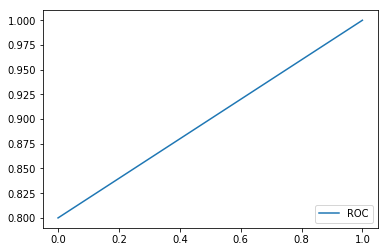

CONFUSION MATRIX 2xd0.cif1_W
[[17  0]
 [ 1  3]]

AUC =  0.875


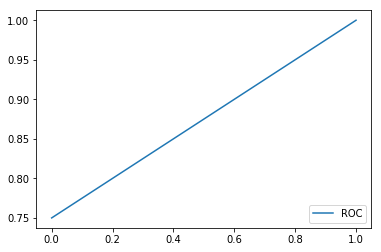

CONFUSION MATRIX 1et4.cif1_A
[[12  0]
 [ 2  1]]

AUC =  0.6666666666666666


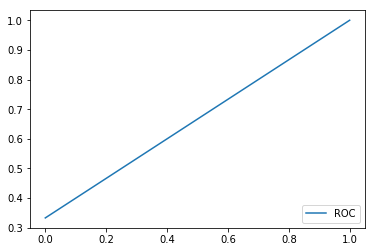

CONFUSION MATRIX 4lck.cif1_F
[[25  1]
 [ 3  2]]

AUC =  0.6807692307692307


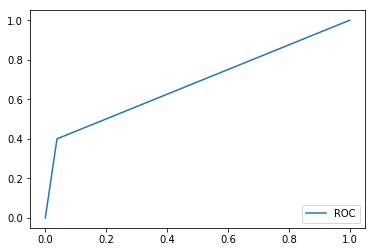

CONFUSION MATRIX 4qk8.cif1_A
[[28  3]
 [ 0  5]]

AUC =  0.9516129032258064


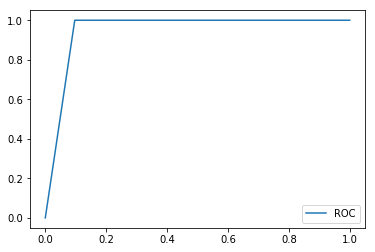

CONFUSION MATRIX 5d8h.cif1_A
[[18  1]
 [ 0  4]]

AUC =  0.9736842105263158


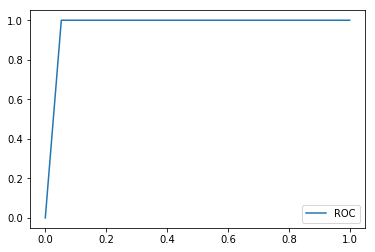

CONFUSION MATRIX 4y1j.cif1_A
[[25  0]
 [ 1  4]]

AUC =  0.9


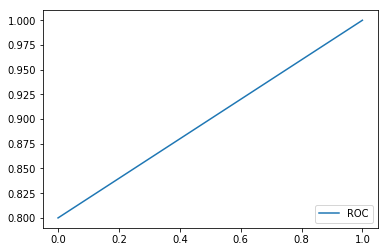

CONFUSION MATRIX 4m4o.cif1_B
[[7 6]
 [0 3]]

AUC =  0.7692307692307692


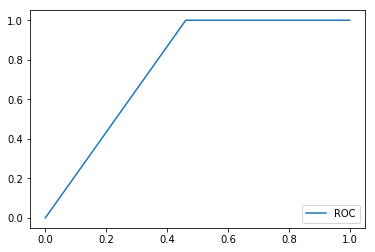

CONFUSION MATRIX 5j7l.cif1_DB
[[47  1]
 [ 0  9]]

AUC =  0.9895833333333333


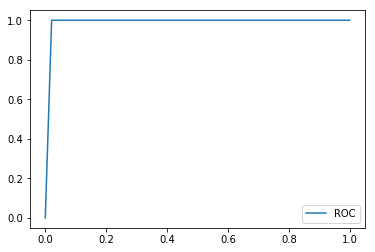

CONFUSION MATRIX 4p95.cif1_A
[[74  0]
 [ 9  3]]

AUC =  0.625


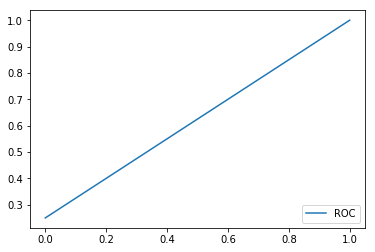

CONFUSION MATRIX 5xy3.cif1_3
[[42  2]
 [ 1  7]]

AUC =  0.9147727272727273


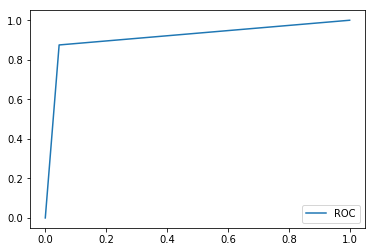

CONFUSION MATRIX 5o5j.cif1_A
[[490   2]
 [ 15  67]]

AUC =  0.9065040650406503


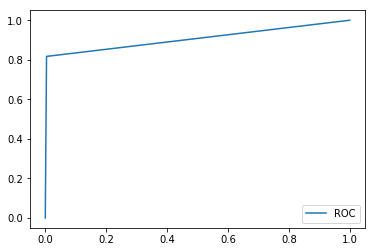

CONFUSION MATRIX 4pcj.cif1_A
[[3 0]
 [0 1]]

AUC =  1.0


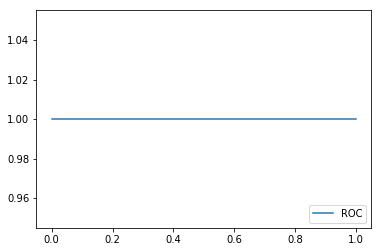

CONFUSION MATRIX 6az3.cif1_7
[[15  1]
 [ 0  3]]

AUC =  0.96875


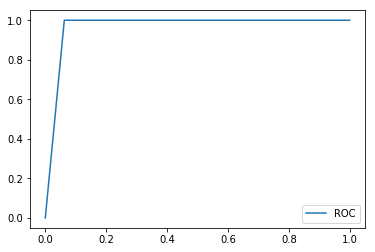

CONFUSION MATRIX 5swd.cif1_B
[[1 0]
 [1 0]]

AUC =  0.5


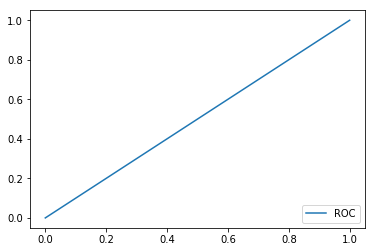

CONFUSION MATRIX 6ek0.cif1_L7
[[40  1]
 [ 0  8]]

AUC =  0.9878048780487805


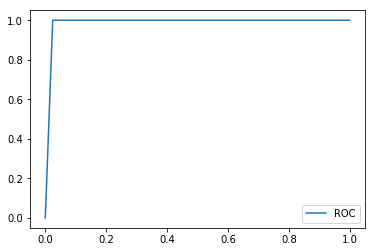

CONFUSION MATRIX 5el4.cif1_3L
[[16  0]
 [ 0  3]]

AUC =  1.0


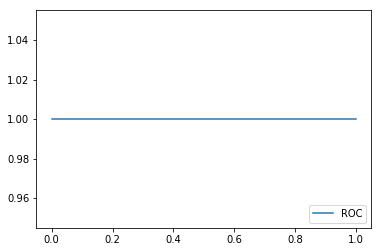

CONFUSION MATRIX 5y7m.cif1_D
[[1 0]
 [0 1]]

AUC =  1.0


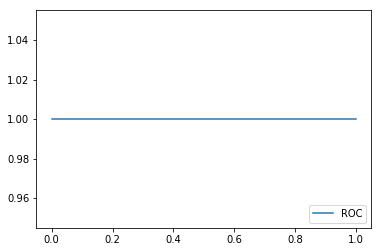

CONFUSION MATRIX 5oql.cif1_2
[[17  1]
 [ 0  3]]

AUC =  0.9722222222222222


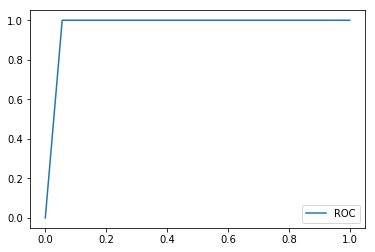

CONFUSION MATRIX 1u6b.cif1_B
[[57  2]
 [ 5  6]]

AUC =  0.7557781201848998


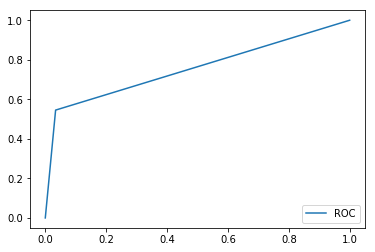

CONFUSION MATRIX 5ah5.cif1_D
[[8 0]
 [1 1]]

AUC =  0.75


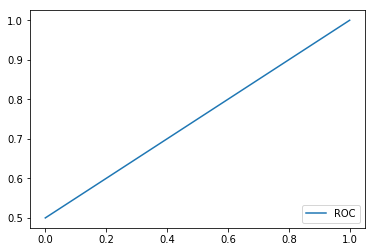

CONFUSION MATRIX 3ivk.cif1_M
[[36  1]
 [ 4  2]]

AUC =  0.6531531531531531


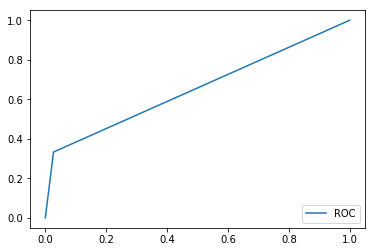

CONFUSION MATRIX 6ha1.cif1_x
[[2 0]
 [0 1]]

AUC =  1.0


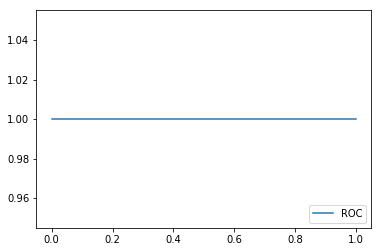

CONFUSION MATRIX 4nlf.cif1_A
[[1]]

ERROR Only one class present in y_true. ROC AUC score is not defined in that case. 4nlf.cif1_A


C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\ranking.py:563: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


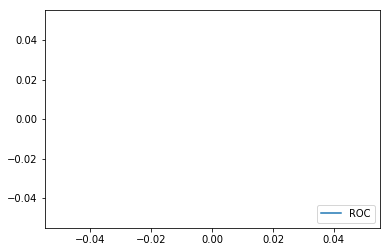

CONFUSION MATRIX 3rg5.cif1_B
[[2 0]
 [1 0]]

AUC =  0.5


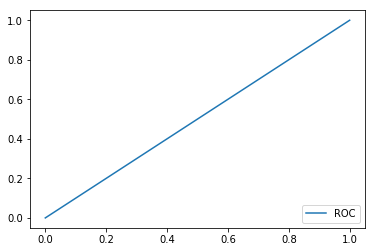

CONFUSION MATRIX 6cfj.cif1_1x
[[11  4]
 [ 0  3]]

AUC =  0.8666666666666667


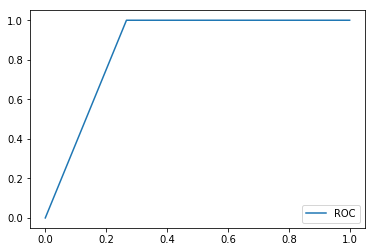

CONFUSION MATRIX 5xyi.cif1_2
[[367   1]
 [ 15  46]]

AUC =  0.875690484675695


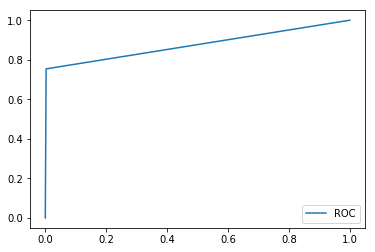

CONFUSION MATRIX 4jxz.cif1_B
[[6 1]
 [0 2]]

AUC =  0.9285714285714286


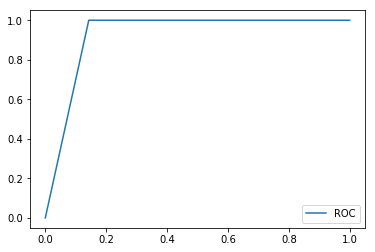

CONFUSION MATRIX 3u4m.cif1_B
[[22  2]
 [ 5  0]]

AUC =  0.4583333333333333


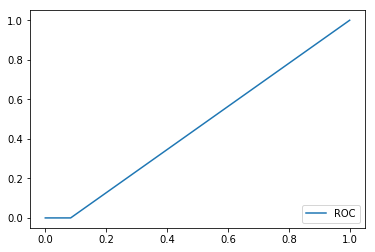

CONFUSION MATRIX 3ivn.cif1_A
[[17  0]
 [ 2  1]]

AUC =  0.6666666666666666


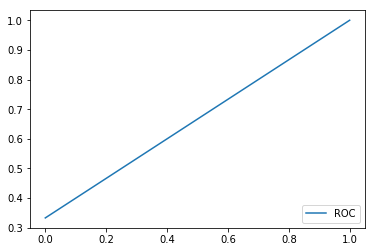

CONFUSION MATRIX 3icq.cif1_E
[[10  3]
 [ 0  3]]

AUC =  0.8846153846153846


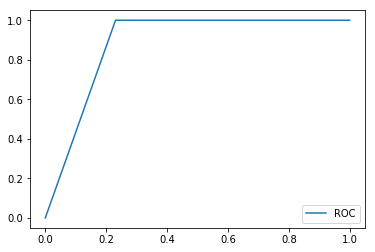

CONFUSION MATRIX 6eri.cif1_Ax
[[33  3]
 [ 0  7]]

AUC =  0.9583333333333333


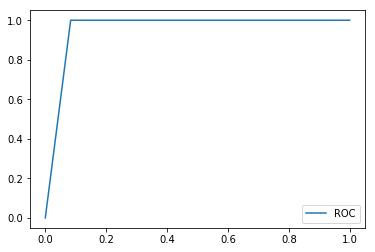

CONFUSION MATRIX 5tpy.cif1_A
[[6 0]
 [1 0]]

AUC =  0.5


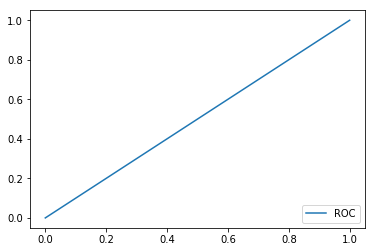

CONFUSION MATRIX 5xym.cif1_B
[[38  2]
 [ 0  7]]

AUC =  0.975


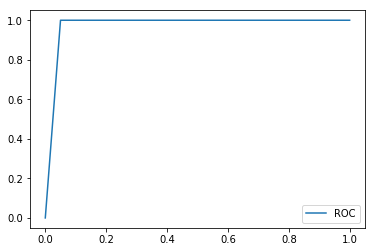

CONFUSION MATRIX 1q96.cif1_A
[[0 1]
 [0 1]]

AUC =  0.5


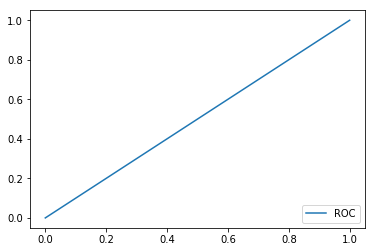

CONFUSION MATRIX 3g9c.cif1_Q
[[17  0]
 [ 3  0]]

AUC =  0.5


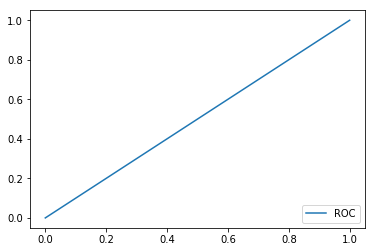

CONFUSION MATRIX 3q3z.cif1_V
[[19  0]
 [ 3  1]]

AUC =  0.625


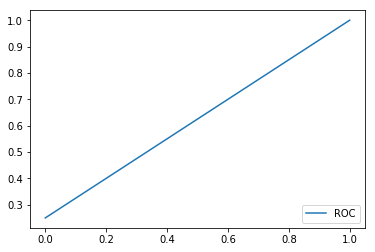

CONFUSION MATRIX 5btp.cif1_B
[[2 0]
 [1 0]]

AUC =  0.5


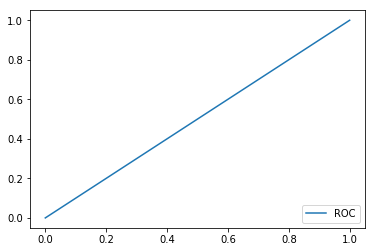

CONFUSION MATRIX 5hr6.cif1_C
[[15  2]
 [ 1  3]]

AUC =  0.8161764705882352


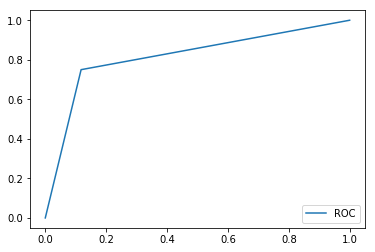

CONFUSION MATRIX 6d9j.cif1_2
[[327   0]
 [ 19  36]]

AUC =  0.8272727272727273


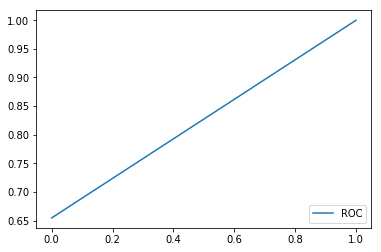

CONFUSION MATRIX 4enc.cif1_A
[[6 0]
 [1 0]]

AUC =  0.5


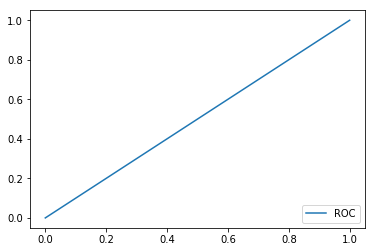

CONFUSION MATRIX 5e6m.cif1_C
[[21  2]
 [ 2  3]]

AUC =  0.7565217391304349


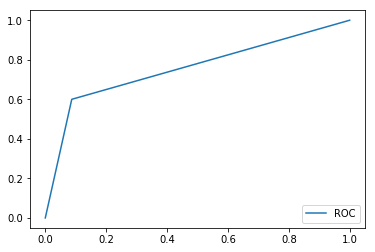

CONFUSION MATRIX 1kuq.cif1_B
[[6 1]
 [0 1]]

AUC =  0.9285714285714286


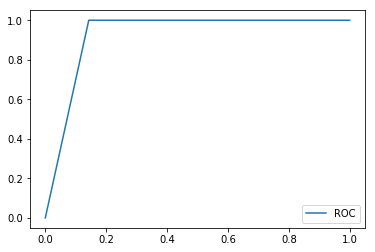

CONFUSION MATRIX 3j79.cif1_A
[[824   3]
 [ 43  95]]

AUC =  0.8423891137865166


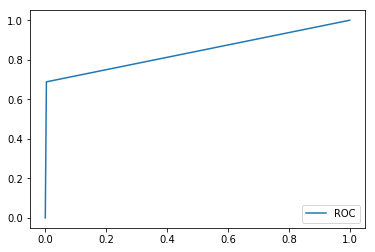

CONFUSION MATRIX 4lfb.cif1_A
[[498   2]
 [ 18  66]]

AUC =  0.8908571428571428


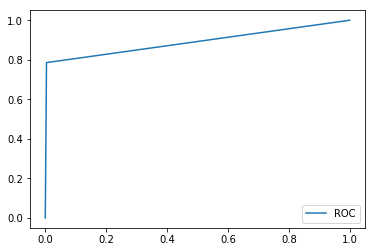

CONFUSION MATRIX 2qus.cif1_A
[[17  0]
 [ 2  2]]

AUC =  0.75


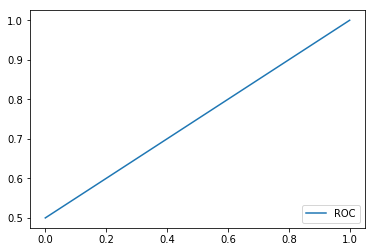

CONFUSION MATRIX 1j1u.cif1_B
[[23  0]
 [ 0  4]]

AUC =  1.0


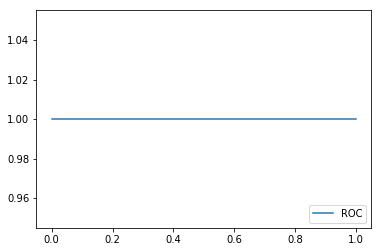

CONFUSION MATRIX 5b63.cif1_D
[[15  0]
 [ 0  3]]

AUC =  1.0


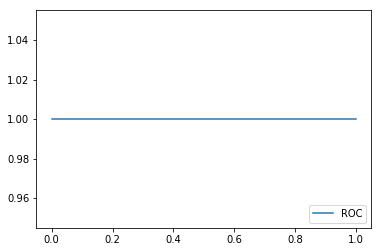

CONFUSION MATRIX 6d9j.cif1_7
[[27  1]
 [ 0  5]]

AUC =  0.9821428571428572


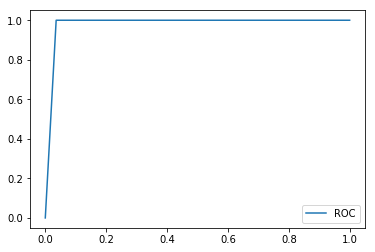

CONFUSION MATRIX 4xnr.cif1_X
[[14  0]
 [ 1  2]]

AUC =  0.8333333333333333


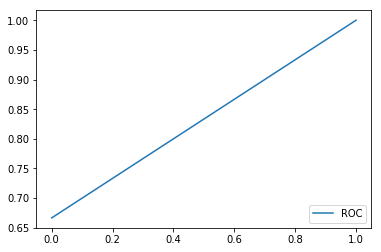

CONFUSION MATRIX 1mfq.cif1_A
[[27  0]
 [ 4  1]]

AUC =  0.6


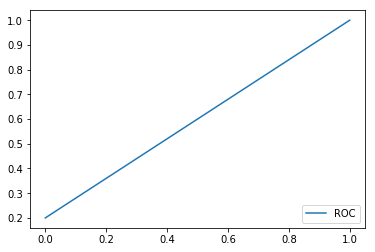

CONFUSION MATRIX 5voe.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


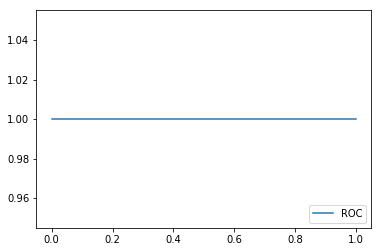

CONFUSION MATRIX 5tbw.cif1_AS
[[40  1]
 [ 0  7]]

AUC =  0.9878048780487805


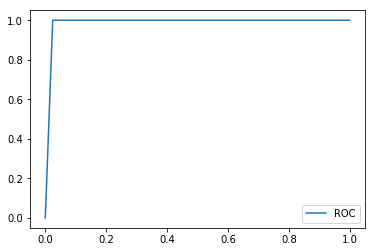

CONFUSION MATRIX 5fdv.cif1_1B
[[56  0]
 [ 0 11]]

AUC =  1.0


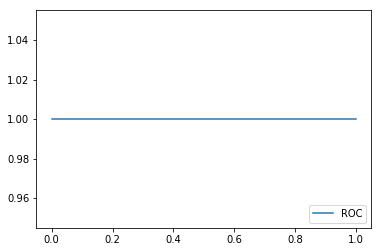

CONFUSION MATRIX 3ski.cif1_A
[[18  0]
 [ 2  2]]

AUC =  0.75


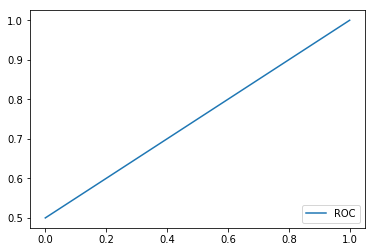

CONFUSION MATRIX 2dlc.cif1_Y
[[7 1]
 [0 2]]

AUC =  0.9375


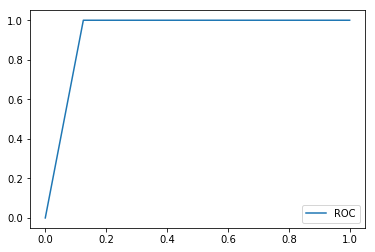

CONFUSION MATRIX 1xjr.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


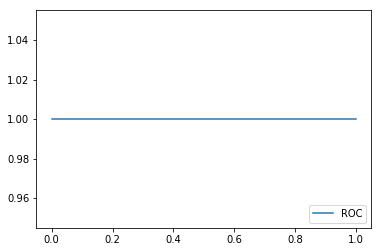

CONFUSION MATRIX 6az1.cif1_1
[[500   1]
 [ 28  56]]

AUC =  0.8323353293413173


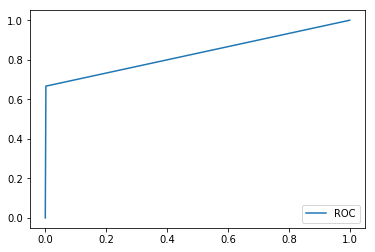

CONFUSION MATRIX 1n78.cif1_C
[[19  1]
 [ 1  3]]

AUC =  0.85


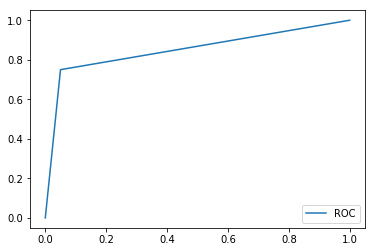

CONFUSION MATRIX 4y1m.cif1_B
[[15  0]
 [ 2  1]]

AUC =  0.6666666666666666


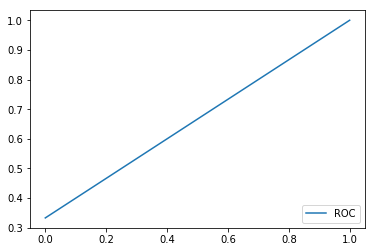

CONFUSION MATRIX 4m6d.cif1_H
[[8 8]
 [0 3]]

AUC =  0.75


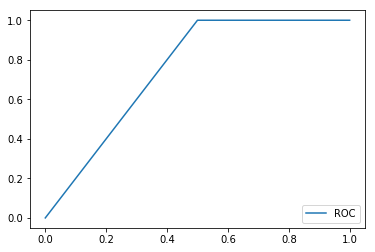

CONFUSION MATRIX 5lzs.cif1_3
[[13  1]
 [ 0  3]]

AUC =  0.9642857142857143


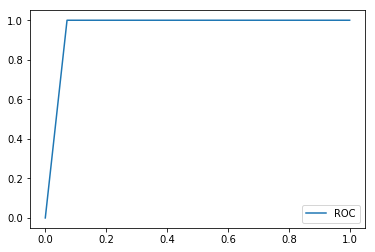

CONFUSION MATRIX 5t5h.cif1_C
[[18  0]
 [ 0  3]]

AUC =  1.0


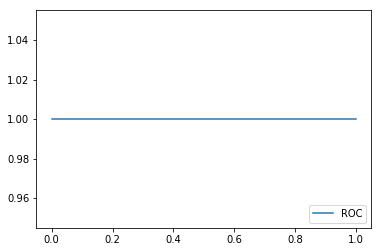

CONFUSION MATRIX 3v7e.cif1_C
[[23  2]
 [ 2  3]]

AUC =  0.7600000000000001


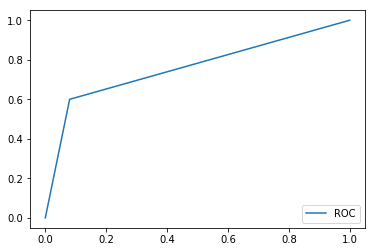

CONFUSION MATRIX 1qtq.cif1_B
[[19  2]
 [ 2  2]]

AUC =  0.7023809523809524


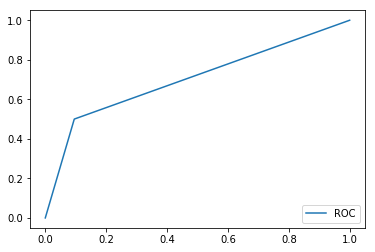

CONFUSION MATRIX 5e81.cif1_2K
[[14  0]
 [ 0  3]]

AUC =  1.0


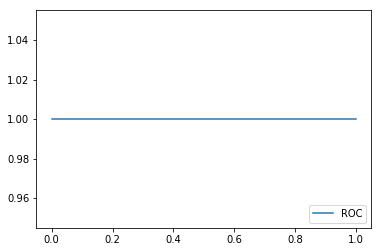

CONFUSION MATRIX 4znp.cif1_A
[[14  0]
 [ 2  1]]

AUC =  0.6666666666666666


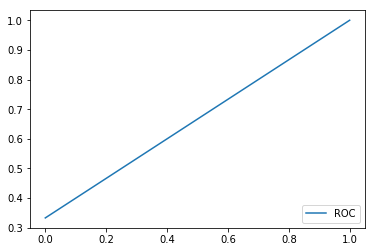

CONFUSION MATRIX 1hc8.cif1_C
[[13  0]
 [ 0  3]]

AUC =  1.0


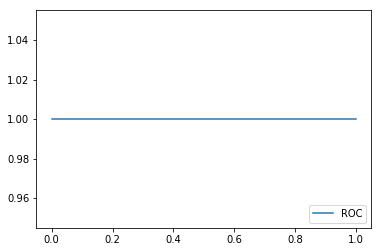

CONFUSION MATRIX 5wwt.cif1_C
[[15  2]
 [ 0  3]]

AUC =  0.9411764705882353


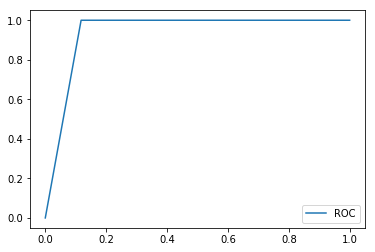

CONFUSION MATRIX 1b23.cif1_R
[[14  2]
 [ 3  0]]

AUC =  0.4375


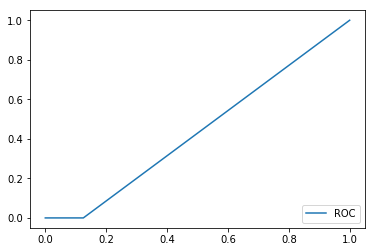

CONFUSION MATRIX 4lck.cif1_B
[[11  0]
 [ 0  2]]

AUC =  1.0


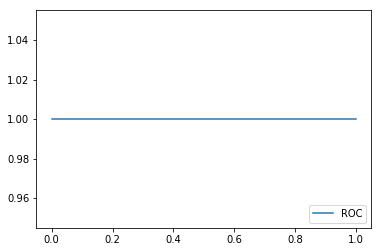

CONFUSION MATRIX 6d90.cif1_3
[[8 0]
 [1 1]]

AUC =  0.75


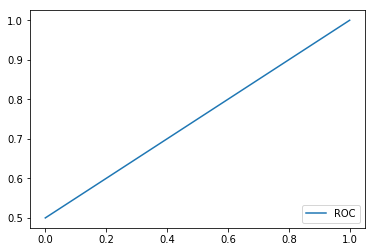

CONFUSION MATRIX 4fen.cif1_B
[[15  0]
 [ 2  1]]

AUC =  0.6666666666666666


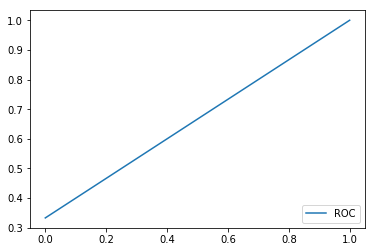

CONFUSION MATRIX 3moj.cif1_A
[[8 0]
 [0 2]]

AUC =  1.0


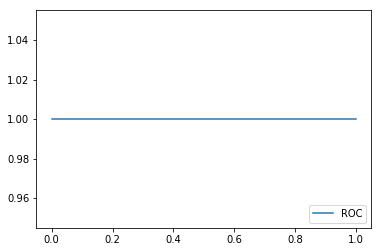

CONFUSION MATRIX 4wf9.cif1_Y
[[48  2]
 [ 2  8]]

AUC =  0.88


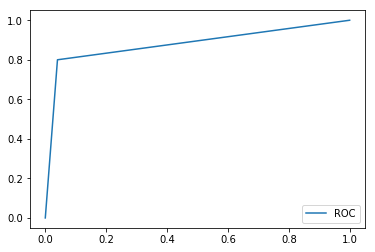

CONFUSION MATRIX 3lqx.cif1_B
[[1 0]
 [0 1]]

AUC =  1.0


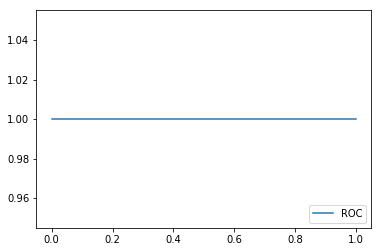

CONFUSION MATRIX 5fjc.cif1_A
[[31  3]
 [ 3  4]]

AUC =  0.7415966386554622


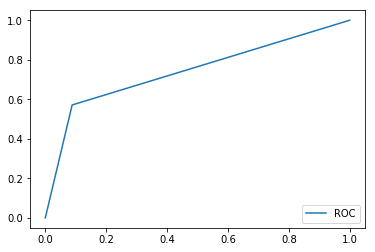

CONFUSION MATRIX 5mmm.cif1_z
[[16  1]
 [ 0  3]]

AUC =  0.9705882352941176


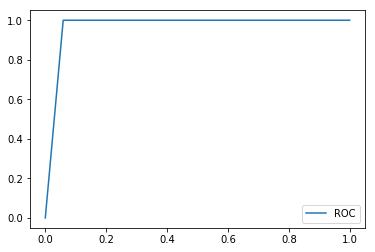

CONFUSION MATRIX 4ioa.cif1_Y
[[49  2]
 [ 0  9]]

AUC =  0.9803921568627452


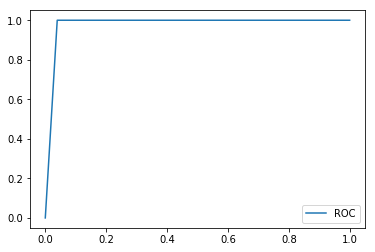

CONFUSION MATRIX 4v9f.cif1_0
[[987   1]
 [ 52 113]]

AUC =  0.8419181695497484


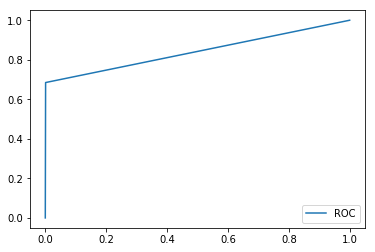

CONFUSION MATRIX 4zdo.cif1_E
[[3 0]
 [1 0]]

AUC =  0.5


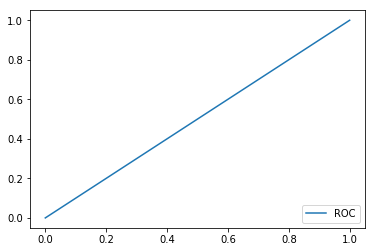

CONFUSION MATRIX 5e81.cif1_3L
[[1 1]
 [0 1]]

AUC =  0.75


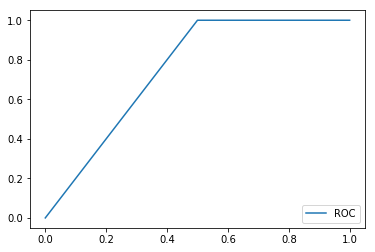

CONFUSION MATRIX 5u3g.cif1_B
[[22  0]
 [ 2  2]]

AUC =  0.75


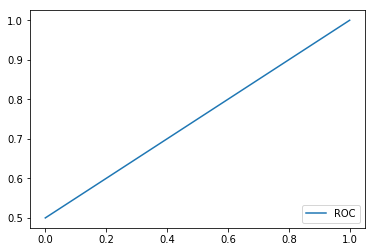

CONFUSION MATRIX 5t5h.cif1_B
[[242   0]
 [  7  34]]

AUC =  0.9146341463414633


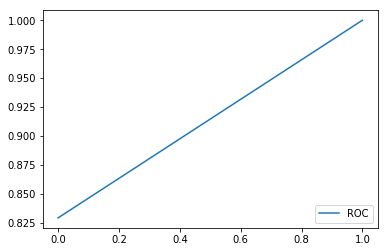

CONFUSION MATRIX 3igi.cif1_A
[[54  0]
 [ 6  3]]

AUC =  0.6666666666666666


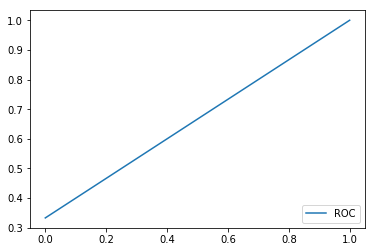

CONFUSION MATRIX 4wq1.cif1_3K
[[2 0]
 [0 1]]

AUC =  1.0


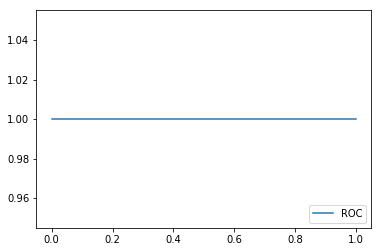

CONFUSION MATRIX 5x6b.cif1_P
[[2 0]
 [1 0]]

AUC =  0.5


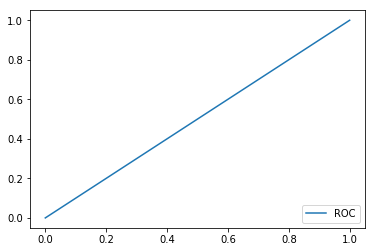

CONFUSION MATRIX 4rum.cif1_A
[[1 0]
 [0 1]]

AUC =  1.0


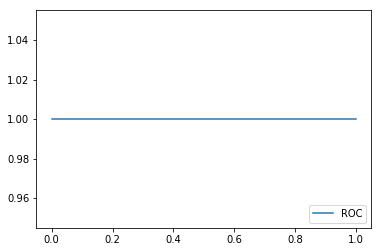

CONFUSION MATRIX 3agv.cif1_S
[[1 0]
 [0 1]]

AUC =  1.0


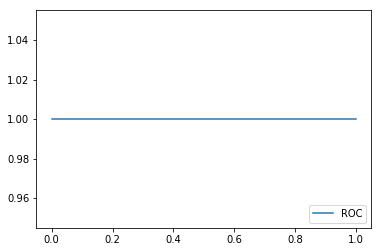

CONFUSION MATRIX 5e81.cif1_1K
[[12  0]
 [ 2  1]]

AUC =  0.6666666666666666


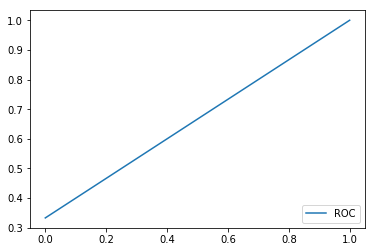

CONFUSION MATRIX 5wt1.cif1_C
[[27  0]
 [ 0  5]]

AUC =  1.0


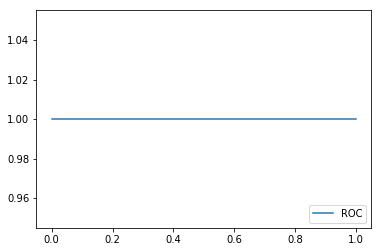

CONFUSION MATRIX 3j79.cif1_C
[[23  0]
 [ 0  4]]

AUC =  1.0


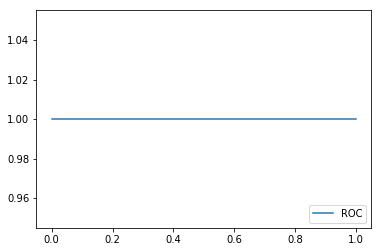

CONFUSION MATRIX 4wj4.cif1_B
[[28  0]
 [ 1  4]]

AUC =  0.9


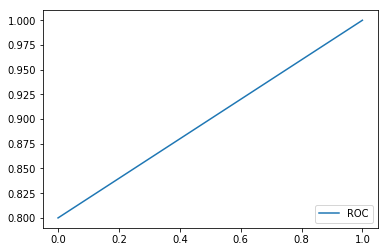

CONFUSION MATRIX 5czz.cif1_B
[[3 0]
 [0 1]]

AUC =  1.0


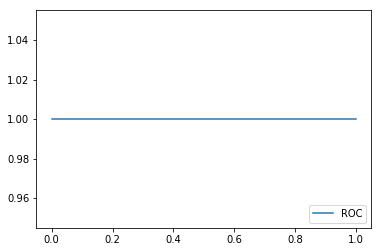

CONFUSION MATRIX 1y26.cif1_X
[[13  0]
 [ 1  2]]

AUC =  0.8333333333333333


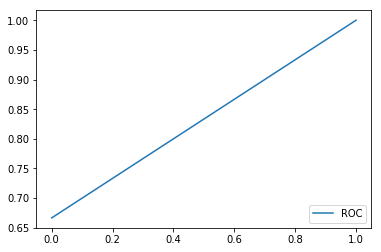

CONFUSION MATRIX 1mms.cif1_C
[[10  4]
 [ 0  3]]

AUC =  0.8571428571428572


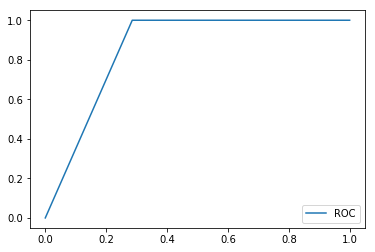

CONFUSION MATRIX 4pdb.cif1_I
[[6 0]
 [0 2]]

AUC =  1.0


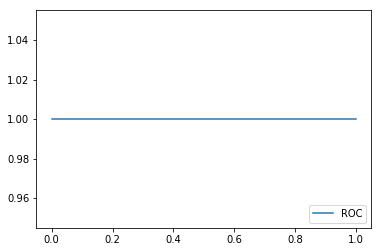

CONFUSION MATRIX 3hhn.cif1_E
[[26  1]
 [ 4  0]]

AUC =  0.4814814814814815


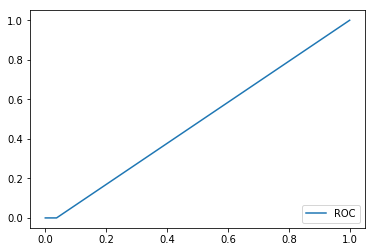

CONFUSION MATRIX 5de8.cif1_A
[[0 1]
 [0 1]]

AUC =  0.5


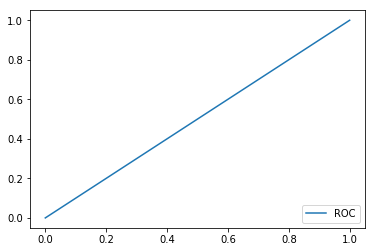

CONFUSION MATRIX 5ns3.cif1_C
[[15  1]
 [ 0  4]]

AUC =  0.96875


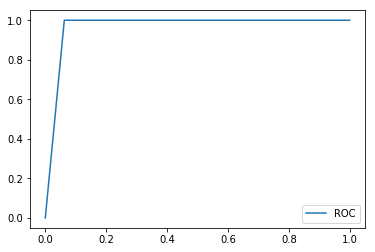

CONFUSION MATRIX 6ek0.cif1_L8
[[17  0]
 [ 0  3]]

AUC =  1.0


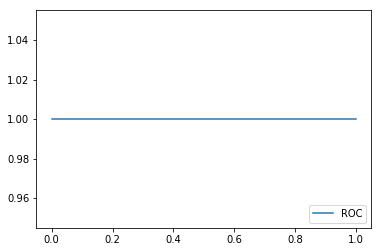

CONFUSION MATRIX 6cmn.cif1_D
[[1 1]
 [0 1]]

AUC =  0.75


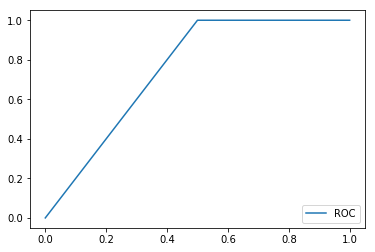

CONFUSION MATRIX 3zgz.cif1_B
[[8 0]
 [1 1]]

AUC =  0.75


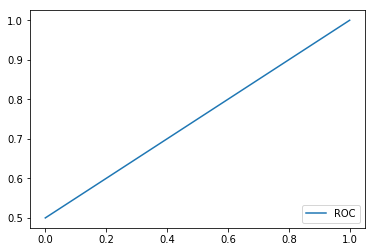

CONFUSION MATRIX 5xxb.cif1_1
[[720   1]
 [ 35  86]]

AUC =  0.8546784195504407


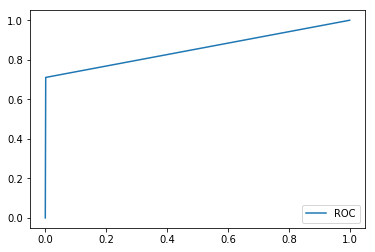

CONFUSION MATRIX 6dn2.cif1_X
[[1 0]
 [0 1]]

AUC =  1.0


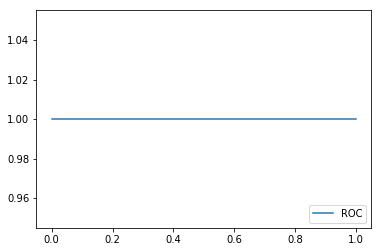

In [232]:
chains = list(set(check_test.pdb_chain.values))

for chain in chains:
    middle_check_test = check_test.loc[check_test['pdb_chain'] == chain]
    middle_target_test = middle_check_test['istriple']
    middle_check_test = middle_check_test.iloc[:, 5:475]
    
    prediction_result = rf_classifier.predict(middle_check_test)

    print("CONFUSION MATRIX", chain)
    print(confusion_matrix(middle_target_test, prediction_result))
    print("")
    fpr, tpr, _ = metrics.roc_curve(middle_target_test,  prediction_result)
    try:
        auc = metrics.roc_auc_score(middle_target_test, prediction_result)
        print("AUC = ", auc)
    except Exception as e:
        print("ERROR", e, chain)
    plt.plot(fpr, tpr, label="ROC")
    plt.legend(loc=4)
    plt.show()

In [223]:
chains = list(set(check_test.pdb_chain.values))


df.loc[df['column_name'] == some_value]

In [216]:
target_train = check_train.istriple.values
target_test = check_test.istriple.values


In [55]:
check_train = check_train.drop('istriple', axis=1)

In [57]:
check_test = check_test.drop('istriple', axis=1)

In [56]:
check_train.columns

Index(['pdb_chain', 'type', 'dssrs', 'bps', 'dists', 'same12', 'local12',
       'longrange12', 'same23', 'local23',
       ...
       's3p5', 'h3p5', 'b3p5', 'i3p5', 'j3p5', 'lc3p5', 'li3p5', 'lp3p5',
       'fl3p5', 'fed3p5'],
      dtype='object', length=476)

In [217]:
#middle check of shuffle
a = Counter(list(check_train.pdb_chain.values))
b = Counter(list(check_test.pdb_chain.values))

In [61]:
#check_train - target train
#check_test - target_test
check_train = check_train.iloc[:, 5:475]
check_test = check_test.iloc[:, 5:475]

In [218]:
a

Counter({'1c0a.cif1_B': 38,
         '1e8o.cif1_E': 2,
         '1evv.cif1_A': 23,
         '1f1t.cif1_A': 8,
         '1f7u.cif1_B': 11,
         '1fir.cif1_A': 25,
         '1gax.cif1_D': 19,
         '1h3e.cif1_B': 10,
         '1h4s.cif1_T': 33,
         '1i6u.cif1_C': 12,
         '1il2.cif1_C': 22,
         '1j2b.cif1_C': 4,
         '1kh6.cif1_A': 3,
         '1kog.cif1_O': 14,
         '1kxk.cif1_A': 7,
         '1l2x.cif1_A': 5,
         '1mji.cif1_D': 15,
         '1mzp.cif1_B': 19,
         '1nbs.cif1_B': 67,
         '1qf6.cif1_B': 26,
         '1qu2.cif1_T': 19,
         '1s03.cif1_B': 5,
         '1s03.cif1_A': 14,
         '1ser.cif1_T': 20,
         '1u0b.cif1_A': 26,
         '1u9s.cif1_A': 69,
         '1un6.cif1_F': 9,
         '1wz2.cif1_D': 10,
         '1y27.cif1_X': 18,
         '1yfg.cif1_A': 38,
         '2a43.cif1_A': 3,
         '2a64.cif1_A': 61,
         '2azx.cif1_D': 25,
         '2bte.cif1_B': 10,
         '2csx.cif1_C': 23,
         '2d6f.cif1_F': 19,
 

# Модель RandomForestClassifier

In [4]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [100]:
rf_classifier.fit(check_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [101]:
prediction_result = rf_classifier.predict(check_test)

In [244]:
importances = rf_classifier.feature_importances_

In [102]:
print(classification_report(target_test, prediction_result))
print(accuracy_score(target_test, prediction_result))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8593
          1       0.90      0.73      0.81      1484

avg / total       0.95      0.95      0.95     10077

0.9488935198967947


In [104]:
from sklearn.metrics import confusion_matrix
df_confusion = pd.crosstab(target_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [162]:
tn, fp, fn, tp = confusion_matrix(target_test, prediction_result).ravel()
(tn, fp, fn, tp)

(8479, 114, 401, 1083)

In [17]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()

In [253]:
len(target_test), len(prediction_result)

(7861, 6883)

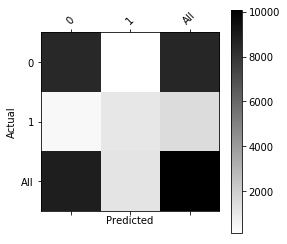

In [105]:
plot_confusion_matrix(target_test, prediction_result)

In [128]:
df_confusion

Predicted,0,1,All
Actual,,,
0,8479,114,8593
1,401,1083,1484
All,8880,1197,10077


In [147]:
# features importances

importances = rf_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(check_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1,  check_train.columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. feature longrange13 (0.119534)
2. feature longrange12 (0.073529)
3. feature same13 (0.072003)
4. feature longrange23 (0.070585)
5. feature same12 (0.059425)
6. feature same23 (0.057597)
7. feature local13 (0.019279)
8. feature local23 (0.016617)
9. feature s1 (0.012341)
10. feature s3 (0.011082)
11. feature local12 (0.009530)
12. feature lc1 (0.006435)
13. feature lc3 (0.006227)
14. feature s2 (0.005344)
15. feature fl1 (0.004630)
16. feature fl2 (0.004530)
17. feature fl3m1 (0.004527)
18. feature fl1p3 (0.004396)
19. feature fl3 (0.004359)
20. feature h3m1 (0.004269)
21. feature h2p4 (0.003947)
22. feature fl2p1 (0.003816)
23. feature fl1p2 (0.003778)
24. feature h3m2 (0.003669)
25. feature fl2m3 (0.003660)
26. feature fl2p4 (0.003641)
27. feature fl2p2 (0.003612)
28. feature fl3p1 (0.003560)
29. feature fl2m1 (0.003508)
30. feature lc2 (0.003454)
31. feature fl2p5 (0.003349)
32. feature fl3p2 (0.003336)
33. feature fl3m5 (0.003309)
34. feature fed1 (0.003205)
35. 

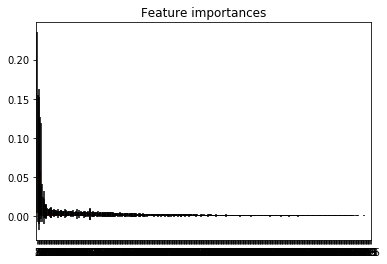

In [148]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(check_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(check_train.shape[1]), indices)
plt.xlim([-1, check_train.shape[1]])
plt.show()

In [125]:
check_train.columns[1]

'local12'

# Кросс-валидация

1) запустить отдельно стандартную кросс-валидацию без групшафл, с 15 сплитами, вывести confusion чего получилось
2) с групшафл тоже сделать 15 сплитов, для каждого сохраняя списки структур (как у тебя в ячейке 44, где middle check of shuffle) и confusion



In [135]:
#Стратегии проведения кросс-валидации
#KFold

for train_indices, test_indices in cross_validation.KFold(10, n_folds = 2, shuffle=True, random_state=0):
    print (train_indices, test_indices)

[0 3 5 6 7] [1 2 4 8 9]
[1 2 4 8 9] [0 3 5 6 7]


In [6]:
#используемая модель
rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [151]:
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=10)


In [152]:
#без групп
results = cross_val_score(rf_classifier_cv, triplexes_data, triplexes_target, cv=kf)

In [153]:
#Array of scores of the estimator for each run of the cross validation.
print(results)

[0.92388146 0.93463103 0.93695526 0.94509006 0.94334689 0.96338274
 0.95321128 0.9471084  0.9581517  0.96018599]


In [158]:
#с группами по pdb_chain
results_groups = cross_val_score(rf_classifier_cv, triplexes_data, triplexes_target, groups=list(triplexes.pdb_chain.values), cv=kf)

In [160]:
#REMARK ЗДЕСЬ ПОХОДУ ГРУППЫ НЕ РАБОТАЮТ

print(results_groups)

[0.92388146 0.93463103 0.93695526 0.94509006 0.94334689 0.96338274
 0.95321128 0.9471084  0.9581517  0.96018599]


# 5 ФОЛДОВ

In [189]:
kf = cross_validation.KFold(len(triplexes_target), n_folds=5)
for train_index, test_index in kf:
    X_train, X_test = triplexes_data.loc[train_index], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")

CONFUSION MATRIX
[[5699  135]
 [ 341  708]]

REPORT
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      5834
          1       0.84      0.67      0.75      1049

avg / total       0.93      0.93      0.93      6883

ACCURACY 0.9308441086735435
-----------------
CONFUSION MATRIX
[[5787   77]
 [ 339  680]]

REPORT
             precision    recall  f1-score   support

          0       0.94      0.99      0.97      5864
          1       0.90      0.67      0.77      1019

avg / total       0.94      0.94      0.94      6883

ACCURACY 0.9395612378323406
-----------------
CONFUSION MATRIX
[[5814   49]
 [ 274  746]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5863
          1       0.94      0.73      0.82      1020

avg / total       0.95      0.95      0.95      6883

ACCURACY 0.953072788028476
-----------------
CONFUSION MATRIX
[[5785   60]
 [ 319  719]]

REPORT
          

In [264]:
gss = GroupShuffleSplit(n_splits=5, test_size=0.3)
# train_dataset_gss_1,test_dataset_gss_1 = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))
# train_dataset_gss_2,test_dataset_gss_2 = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))


for i in range(5):
    train_index, test_index = next(gss.split(X=triplexes, y=triplexes['istriple'], groups=triplexes.pdb_chain.values))
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")

CONFUSION MATRIX
[[9153  116]
 [ 482 1117]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      9269
          1       0.91      0.70      0.79      1599

avg / total       0.94      0.94      0.94     10868

ACCURACY 0.9449760765550239
-----------------
CONFUSION MATRIX
[[8750   93]
 [ 445 1087]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      8843
          1       0.92      0.71      0.80      1532

avg / total       0.95      0.95      0.95     10375

ACCURACY 0.948144578313253
-----------------
CONFUSION MATRIX
[[9851  102]
 [ 530 1189]]

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      9953
          1       0.92      0.69      0.79      1719

avg / total       0.94      0.95      0.94     11672

ACCURACY 0.9458533241946538
-----------------
CONFUSION MATRIX
[[10516    92]
 [  569  1259]]

REPORT
      

# КРОСС-ВАЛИДАЦИЯ ПО ГРУППАМ KFoldGroup

In [7]:
from sklearn.model_selection import GroupKFold

In [201]:
#variant
# import scikitplot as skplt


# y_true = # ground truth labels
# y_probas = # predicted probabilities generated by sklearn classifier
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

In [10]:
def probability_density(y_prob, y):
    
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')
    plt.show()


# НА 5 ФОЛДАХ СТРОИМ CONFUSION MATRIX ПО КАЖДОЙ ГРУППЕ + ОБЩУЮ МАТРИЦУ. 

# ТАКЖЕ СТРОИМ ROC И СЧИТАЕМ AUC ДЛЯ TRAIN И TEST (ЧТОБЫ СРАВНИТЬ)

TEST_GROUPS Counter({'3j7q.cif1_5': 1319, '3j79.cif1_A': 965, '3j7p.cif1_S2': 766, '6ha1.cif1_a': 644, '4lfb.cif1_A': 584, '3j7a.cif1_A': 486, '5xyi.cif1_2': 429, '6d9j.cif1_2': 382, '1u6b.cif1_B': 70, '1nbs.cif1_B': 67, '2a64.cif1_A': 61, '4v9f.cif1_9': 59, '3pdr.cif1_X': 53, '6ek0.cif1_L7': 49, '4r4v.cif1_A': 44, '5fjc.cif1_A': 41, '6d90.cif1_4': 38, '1h4s.cif1_T': 33, '4aob.cif1_A': 33, '3iwn.cif1_A': 32, '4lck.cif1_F': 31, '2der.cif1_D': 30, '5e6m.cif1_C': 28, '3j79.cif1_C': 27, '1u0b.cif1_A': 26, '6az3.cif1_4': 26, '1qtq.cif1_B': 25, '3kfu.cif1_L': 25, '1n78.cif1_C': 24, '5l4o.cif1_A': 24, '2gdi.cif1_X': 23, '3ski.cif1_A': 22, '2qus.cif1_A': 21, '2xd0.cif1_W': 21, '3la5.cif1_A': 20, '4gcw.cif1_B': 20, '5ns3.cif1_C': 20, '1mzp.cif1_B': 19, '1qu2.cif1_T': 19, '4tue.cif1_QV': 19, '4lvw.cif1_A': 18, '4y1m.cif1_B': 18, '1mms.cif1_C': 17, '5e81.cif1_2K': 17, '1hc8.cif1_C': 16, '3icq.cif1_E': 16, '5e81.cif1_1K': 15, '1i6u.cif1_C': 12, '2zni.cif1_C': 12, '3k0j.cif1_E': 12, '4v7m.cif1_AY':

CONFUSION MATRIX By chain:  6d9j.cif1_3
[[3 0]
 [0 1]]

111 A.U.19.A.U.24.A.A.46. -_cWW_tWH 12.36_10.35_9.49 PROBA:  0.416409204795247
111 A.U.25.A.C.42.A.G.47. -_cWW_cWH 11.7_10.45_9.59 PROBA:  0.3589384172969705
CONFUSION MATRIX By chain:  2qus.cif1_A
[[17  0]
 [ 2  2]]

110 E.G.14.E.G.40.E.G.42. -_-_tSS 11.48_6.86_8.34 PROBA:  0.7300543511355516
112 E.G.14.E.A.41.E.G.42. -_-_tSS 11.96_5.27_8.34 PROBA:  0.723679446846624
CONFUSION MATRIX By chain:  3k0j.cif1_E
[[8 2]
 [0 2]]

CONFUSION MATRIX By chain:  3kfu.cif1_L
[[21  0]
 [ 0  4]]

111 A.A.12.A.G.43.A.C.59. cSS_cWW_- 5.59_10.65_8.61 PROBA:  0.21344790410573225
112 A.G.32.A.G.35.A.A.61. -_-_- 7.61_15.51_11.13 PROBA:  0.6695505524201133
112 A.G.23.A.U.31.A.A.62. -_-_tSW 7.81_9.3_9.66 PROBA:  0.7103199882900494
112 A.A.36.A.G.43.A.C.59. -_cWW_- 19.48_10.65_18.42 PROBA:  0.6140744445451116
123 A.G.21.A.A.22.A.G.32. -_-_- 5.93_7.33_7.44 PROBA:  0.5633810137678205
CONFUSION MATRIX By chain:  4aob.cif1_A
[[24  4]
 [ 1  4]]

100 D.U.25.D.

111 A.G.1410.A.C.1419.A.U.1644. cWW_-_cSW 10.89_10.07_10.17 PROBA:  0.3873861229365872
111 A.U.1823.A.G.1885.A.C.1905. cSS_cWW_- 7.45_10.52_7.59 PROBA:  0.318251859463444
111 A.U.1849.A.A.1853.A.U.1895. tWH_tHW_- 9.78_10.57_4.6 PROBA:  0.34768439795500855
CONFUSION MATRIX By chain:  3j7a.cif1_A
[[416   0]
 [ 19  51]]

111 1L.U.8.1L.A.14.1L.U.59. tWH_tWW_- 9.5_9.85_6.15 PROBA:  0.10570263311861446
CONFUSION MATRIX By chain:  5ibb.cif1_1L
[[5 0]
 [1 0]]

112 C.U.12.C.A.22.C.G.47. cWW_-_- 10.94_13.86_14.12 PROBA:  0.5425068198674654
112 C.C.13.C.G.21.C.A.46. cWW_-_- 10.49_10.43_14.4 PROBA:  0.6344927466135987
CONFUSION MATRIX By chain:  2zni.cif1_C
[[8 2]
 [0 2]]

112 L7.G.51.L7.C.52.L7.A.55. -_-_- 5.11_11.08_14.81 PROBA:  0.7563820330009416
CONFUSION MATRIX By chain:  6ek0.cif1_L7
[[40  1]
 [ 0  8]]

111 D.U.8.D.A.14.D.A.47. tWH_t.W_cSW 9.63_13.54_5.87 PROBA:  0.13462536682874984
CONFUSION MATRIX By chain:  2zzn.cif1_D
[[8 0]
 [1 1]]

111 A.U.8.A.A.14.A.A.46. tWH_t.W_cSW 9.73_13.43_5.66 

112 QV.C.12.QV.C.25.QV.G.46. -_-_- 11.04_16.0_14.01 PROBA:  0.5782114883850542
CONFUSION MATRIX By chain:  4tue.cif1_QV
[[15  1]
 [ 0  3]]

111 2.U.12.2.A.1199.2.G.1356. cWW_-_cSS 10.72_12.19_3.87 PROBA:  0.16667550742327397
111 2.C.13.2.A.1143.2.G.1198. -_t.S_cWW 5.14_8.99_10.89 PROBA:  0.3909530319571234
111 2.C.14.2.A.668.2.G.1197. -_cSS_cWW 9.73_5.87_11.06 PROBA:  0.42441602224890046
111 2.A.46.2.U.97.2.G.434. cHS_cWW_- 7.57_9.91_9.63 PROBA:  0.12687566227204802
111 2.U.115.2.A.349.2.C.381. cWW_-_cSW 9.52_11.39_5.87 PROBA:  0.2071285030082033
111 2.U.361.2.U.1174.2.G.1187. cWW_cWS_- 8.84_8.81_7.66 PROBA:  0.11174997717908824
111 2.G.411.2.C.429.2.A.811. cWW_cSW_- 11.63_9.23_12.97 PROBA:  0.34729787492816544
111 2.G.412.2.G.425.2.A.812. tHW_-_tSW 11.12_18.94_9.86 PROBA:  0.3012219464562109
111 2.C.490.2.G.510.2.A.574. cWW_-_cSW 10.75_11.56_9.82 PROBA:  0.20078044143738627
111 2.A.962.2.A.1055.2.C.1063. cWS_cWW_- 9.59_12.7_15.73 PROBA:  0.4127300886480137
111 2.G.1037.2.C.1078.2.A.11

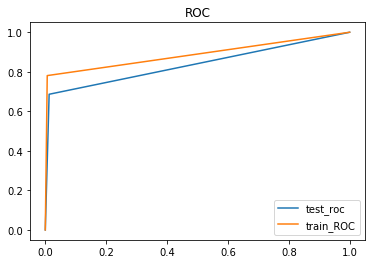

Probability density for train


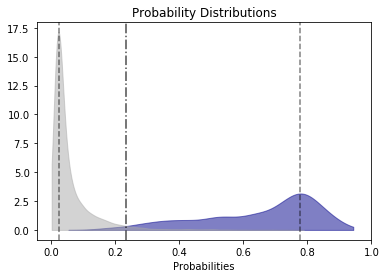

Probability density for test


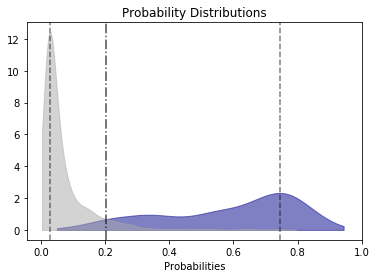


[[5789   74]
 [ 320  700]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5789   74  5863
1           320  700  1020
All        6109  774  6883


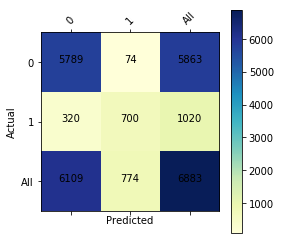


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5863
          1       0.90      0.69      0.78      1020

avg / total       0.94      0.94      0.94      6883

ACCURACY =  0.9427575185238994
-----------------
TEST_GROUPS Counter({'4v9f.cif1_0': 1153, '4ioa.cif1_X': 990, '5mrc.cif1_A': 831, '6d9j.cif1_5': 724, '5o5j.cif1_A': 574, '3jam.cif1_2': 506, '5mrc.cif1_aa': 418, '5t5h.cif1_A': 340, '4p95.cif1_A': 86, '1u9s.cif1_A': 69, '3igi.cif1_A': 63, '4gxy.cif1_A': 60, '5j7l.cif1_DB': 57, '5ml7.cif1_B': 50, '5xym.cif1_B': 47, '6ha1.cif1_B': 41, '4yaz.cif1_R': 38, '4oqu.cif1_A': 35, '4prf.cif1_B': 33, '1mfq.cif1_A': 32, '3hhn.cif1_E': 31, '3v7e.cif1_C': 30, '3u4m.cif1_B': 29, '3wqy.cif1_C': 27, '4qlm.cif1_A': 27, '1qf6.cif1_B': 26, '1fir.cif1_A': 25, '3d2v.cif1_A': 25, '4jrc.cif1_B': 25, '2du3.cif1_D': 24, '5mgp.cif1_x': 23, '1il2.cif1_C': 22, '5tbw.cif1_4': 22, '3amu.cif1_B': 21, '5t5h.cif1_C': 21, '3ivn.cif1_A': 20, '5wwt.cif1_C

110 B.G.2165.B.U.2167.B.A.2171. -_tWH_- 10.45_9.69_11.87 PROBA:  0.7284050891060736
111 B.C.2111.B.U.2144.B.G.2147. -_tSW_cWH 9.91_9.42_8.55 PROBA:  0.23263647919059077
111 B.A.2114.B.A.2119.B.G.2168. tWH_tWS_- 12.08_9.93_6.11 PROBA:  0.29956322676215263
111 B.G.2115.B.U.2167.B.A.2171. -_tWH_tSW 4.45_9.69_9.91 PROBA:  0.3906727627294432
111 B.A.2117.B.G.2166.B.U.2172. t.W_tWH_cWW 13.84_12.58_10.58 PROBA:  0.3784438626684099
111 B.U.2118.B.C.2143.B.G.2148. -_cWW_cHS 12.03_10.57_7.08 PROBA:  0.3034554685633596
120 B.U.2113.B.A.2117.B.A.2119. -_-_- 13.24_8.98_12.76 PROBA:  0.6420031024817273
CONFUSION MATRIX By chain:  3u4m.cif1_B
[[22  2]
 [ 5  0]]

111 A.C.15.A.G.19.A.A.39. cWW_t.W_cSW 10.7_12.97_5.54 PROBA:  0.23564445946934726
CONFUSION MATRIX By chain:  4oji.cif1_A
[[9 0]
 [1 1]]

111 C.G.19.C.U.20.C.C.56. cSH_-_cWW 6.48_11.52_10.67 PROBA:  0.2690559875717086
CONFUSION MATRIX By chain:  3add.cif1_C
[[2 0]
 [1 0]]

111 5.A.14.5.A.19.5.A.114. cSW_-_tHH 9.19_21.02_13.3 PROBA:  0.2114307

111 0.C.36.0.G.446.0.A.674. cWW_-_cSW 10.71_12.14_9.51 PROBA:  0.3640226472853174
111 0.G.51.0.C.110.0.U.121. cWW_-_tSW 10.56_6.05_8.65 PROBA:  0.4182235157472099
111 0.A.59.0.G.61.0.C.85. -_cWW_tW. 9.68_10.74_13.19 PROBA:  0.483609532459112
111 0.G.157.0.C.179.0.A.1470. cWW_-_cSW 10.74_12.57_5.72 PROBA:  0.3425596299443401
111 0.A.193.0.G.413.0.C.427. t.S_cWW_- 8.2_10.54_5.63 PROBA:  0.4545448944246646
111 0.A.198.0.G.416.0.C.424. tWS_cWW_- 9.53_10.77_10.44 PROBA:  0.3848972693277769
111 0.U.396.0.G.2442.0.C.2450. tHS_cWW_- 11.03_10.75_9.17 PROBA:  0.32586560973868167
111 0.A.419.0.C.1920.0.U.2448. cSW_-_cWW 7.93_12.03_10.5 PROBA:  0.26824861063880484
111 0.A.449.0.C.1305.0.G.1349. -_cWW_t.S 5.66_10.55_8.36 PROBA:  0.23120600610212388
111 0.G.471.0.C.774.0.G.887. cSS_cWW_tW. 5.83_10.82_13.54 PROBA:  0.4259630103595143
111 0.A.552.0.G.1323.0.C.1334. tSS_cWW_- 8.44_10.62_5.7 PROBA:  0.353591797338094
111 0.A.565.0.A.1092.0.U.1264. -_cWW_cSS 11.15_9.76_5.51 PROBA:  0.26257401589297413
11

111 5.C.1662.5.G.2287.5.G.2321. cWW_-_cSS 10.83_13.1_4.22 PROBA:  0.3916724778011592
111 5.A.1679.5.U.3912.5.A.4390. cHS_cWW_- 8.38_10.71_11.6 PROBA:  0.35911660791847766
111 5.C.1856.5.G.1878.5.A.1892. cWW_cSW_- 10.65_6.55_9.86 PROBA:  0.43851083571690835
111 5.U.1863.5.A.1871.5.A.4220. cWW_-_tSW 10.67_8.22_8.81 PROBA:  0.2361968086612146
111 5.G.1886.5.C.1893.5.C.1936. cWW_cSW_- 10.8_7.43_14.15 PROBA:  0.4794434428103274
111 5.C.1963.5.G.2024.5.G.4694. tHS_-_cWW 9.84_9.78_10.33 PROBA:  0.12148541456778035
111 5.A.2043.5.C.4461.5.G.4515. -_cWW_tSS 5.58_10.71_7.87 PROBA:  0.13604266849824792
111 5.G.2439.5.G.2518.5.U.2538. tSS_-_cWW 8.42_6.6_11.78 PROBA:  0.16457153434699417
111 5.G.2442.5.A.2512.5.C.2780. cSW_-_cWW 6.01_12.94_10.77 PROBA:  0.4819186780897894
111 5.G.2457.5.C.2464.5.G.3672. cWW_t.W_- 10.69_9.47_5.23 PROBA:  0.3663223494392904
111 5.G.2522.5.C.2533.5.G.2711. cWW_-_cSW 10.78_11.24_9.62 PROBA:  0.28224703017154396
111 5.U.2592.5.G.2753.5.C.4126. tHS_-_cWW 10.03_11.25_8.07

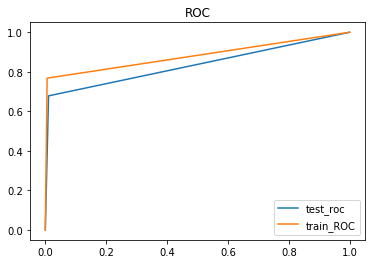

Probability density for train


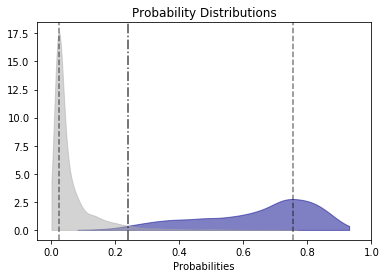

Probability density for test


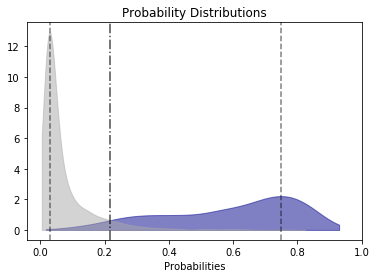


[[5807   63]
 [ 326  687]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5807   63  5870
1           326  687  1013
All        6133  750  6883


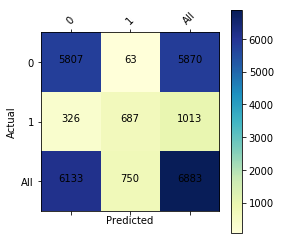


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5870
          1       0.92      0.68      0.78      1013

avg / total       0.94      0.94      0.94      6883

ACCURACY =  0.9434839459537993
-----------------
TEST_GROUPS Counter({'4y4o.cif1_2A': 1112, '6eri.cif1_AA': 1013, '5tbw.cif1_1': 937, '4v88.cif1_A6': 639, '5ool.cif1_A': 568, '6eri.cif1_BA': 540, '6az3.cif1_1': 397, '3j9m.cif1_AA': 318, '5oql.cif1_1': 155, '5fdv.cif1_1B': 67, '4wf9.cif1_Y': 60, '3j79.cif1_B': 57, '5xy3.cif1_3': 52, '5tbw.cif1_AS': 48, '3ivk.cif1_M': 43, '1c0a.cif1_B': 38, '4qk8.cif1_A': 36, '3f2x.cif1_X': 33, '4yye.cif1_C': 33, '5lys.cif1_B': 32, '4uyk.cif1_R': 30, '4rdx.cif1_C': 28, '1j1u.cif1_B': 27, '5hr7.cif1_D': 27, '5aj0.cif1_Bv': 26, '6d9j.cif1_8': 26, '2azx.cif1_D': 25, '4mgn.cif1_B': 24, '5axm.cif1_P': 24, '1evv.cif1_A': 23, '5ool.cif1_B': 23, '4qei.cif1_C': 22, '3d0u.cif1_A': 21, '5zwn.cif1_P': 21, '2xdb.cif1_G': 20, '3w3s.cif1_B': 20, '5ju

111 A.A.20.A.G.66.A.A.124. cWW_tSW_- 12.71_10.09_13.39 PROBA:  0.34201081295216385
112 A.A.20.A.U.25.A.A.62. -_tWH_- 16.45_9.62_17.7 PROBA:  0.6046746584492682
CONFUSION MATRIX By chain:  3d0u.cif1_A
[[17  1]
 [ 1  2]]

CONFUSION MATRIX By chain:  5axm.cif1_P
[[20  0]
 [ 0  4]]

111 EC.U.6787.EC.G.6808.EC.G.6809. c.W_cSH_cWH 13.11_7.44_11.33 PROBA:  0.35644800465777854
111 EC.A.6790.EC.C.6850.EC.G.6878. -_cWW_tSS 6.86_10.8_5.92 PROBA:  0.16391833992749127
CONFUSION MATRIX By chain:  5jup.cif1_EC
[[17  0]
 [ 2  1]]

111 B.A.34.B.C.38.B.G.69. -_cWW_tWH 13.12_10.7_12.06 PROBA:  0.2393503628677663
112 B.U.40.B.U.66.B.C.67. -_-_- 14.95_5.19_12.93 PROBA:  0.6106827548868883
CONFUSION MATRIX By chain:  5lys.cif1_B
[[25  1]
 [ 1  5]]

110 A6.U.98.A6.A.251.A6.A.385. -_-_cWW 50.2_42.2_10.1 PROBA:  0.5774145624198459
111 A6.A.47.A6.U.98.A6.A.385. cHS_cWW_- 7.84_10.1_11.73 PROBA:  0.48434054485417927
111 A6.A.62.A6.C.268.A6.G.287. -_cWW_tSS 5.88_10.62_8.52 PROBA:  0.2678563994866415
111 A6.A.85.A6

111 A.G.210.A.C.218.A.G.228. ..._cWW_cWH 14.42_10.57_11.66 PROBA:  0.2882573761477884
112 A.G.208.A.C.218.A.C.221. -_-_cWW 17.55_13.87_10.55 PROBA:  0.5066328750408338
112 A.G.207.A.C.221.A.A.225. -_-_- 13.92_5.7_12.77 PROBA:  0.5101300658480507
CONFUSION MATRIX By chain:  1et4.cif1_A
[[10  2]
 [ 1  2]]

110 M.A.73.M.U.76.M.U.84. -_-_cWW 14.64_17.39_10.09 PROBA:  0.6396172928709446
111 M.A.29.M.G.72.M.C.85. tWS_cWW_- 8.34_10.4_7.13 PROBA:  0.4403865852873687
111 M.A.31.M.A.73.M.U.84. -_cWW_cWS 10.74_10.09_9.44 PROBA:  0.34405814613752755
111 M.A.32.M.G.74.M.C.83. tWS_cWW_- 9.38_10.74_10.72 PROBA:  0.39919894000942263
100 M.A.31.M.G.78.M.C.79. -_-_- 27.89_5.31_28.38 PROBA:  0.5322369892227897
CONFUSION MATRIX By chain:  3ivk.cif1_M
[[35  2]
 [ 3  3]]

111 E.G.19.E.U.20.E.C.56. cSH_-_cWW 6.39_12.05_10.17 PROBA:  0.3284652830380939
CONFUSION MATRIX By chain:  4zdo.cif1_E
[[3 0]
 [1 0]]

111 F.A.11.F.G.66.F.U.109. tWS_cWW_- 8.75_11.0_9.38 PROBA:  0.49695778146352365
CONFUSION MATRIX By cha

CONFUSION MATRIX By chain:  4bw0.cif1_A
[[1]]

111 BA.U.39.BA.A.369.BA.A.496. tWW_cHS_- 11.21_7.98_8.52 PROBA:  0.45408944278813834
111 BA.A.53.BA.G.98.BA.C.286. -_cWW_cWS 12.28_11.29_9.11 PROBA:  0.2747331842145377
111 BA.G.132.BA.C.160.BA.A.1397. cWW_tSW_cSS 10.67_9.13_7.01 PROBA:  0.306531930641442
111 BA.A.133.BA.A.159.BA.A.1396. cWW_-_cSW 12.78_15.97_5.9 PROBA:  0.38789180047551963
111 BA.U.263.BA.A.281.BA.A.556. cWW_cSW_- 10.56_9.71_12.26 PROBA:  0.2757309701788749
111 BA.G.269.BA.A.272.BA.U.514. tSH_cSW_- 9.54_6.18_14.36 PROBA:  0.36728018697830755
111 BA.G.290.BA.C.307.BA.A.1383. cWW_cSW_- 10.95_5.91_13.16 PROBA:  0.33185555475542516
111 BA.A.451.BA.A.458.BA.U.492. -_cWS_cWW 13.65_6.11_10.95 PROBA:  0.36666297764483624
111 BA.A.716.BA.G.1461.BA.C.1474. tSS_cWW_- 8.74_11.2_6.04 PROBA:  0.38706931651959214
111 BA.G.718.BA.C.759.BA.C.849. cWW_cSH_- 10.84_8.51_13.13 PROBA:  0.49147420793636315
111 BA.G.903.BA.C.1175.BA.C.1177. -_cWH_cWW 13.16_8.63_11.13 PROBA:  0.31719079754532586


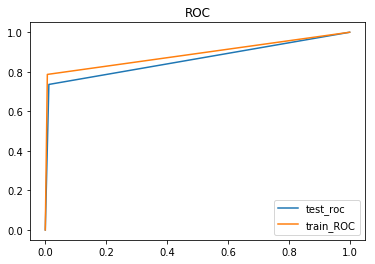

Probability density for train


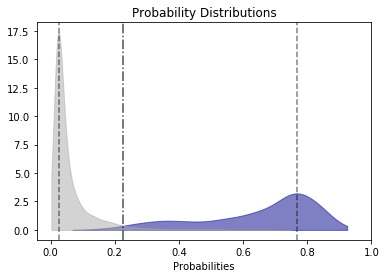

Probability density for test


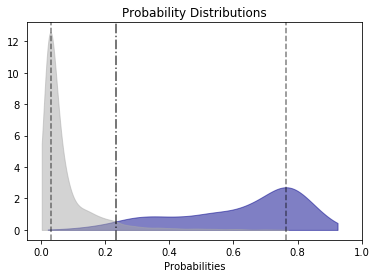


[[5799   69]
 [ 268  747]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5799   69  5868
1           268  747  1015
All        6067  816  6883


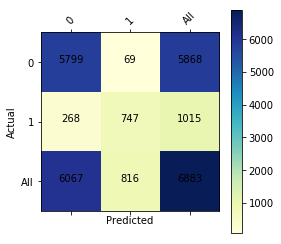


REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5868
          1       0.92      0.74      0.82      1015

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9510387912247567
-----------------
TEST_GROUPS Counter({'5j7l.cif1_DA': 1103, '6ha1.cif1_A': 1028, '5xxb.cif1_1': 842, '5xy3.cif1_1': 762, '6ek0.cif1_S2': 550, '5xxu.cif1_2': 472, '5ngm.cif1_Aa': 462, '5t5h.cif1_B': 283, '6gaz.cif1_AA': 279, '3j7o.cif1_7': 59, '3mxh.cif1_R': 52, '5t5h.cif1_D': 48, '4plx.cif1_A': 44, '4ycp.cif1_B': 40, '2qwy.cif1_C': 37, '2r8s.cif1_R': 33, '4wj4.cif1_B': 33, '5wt1.cif1_C': 32, '4y1j.cif1_A': 30, '4yco.cif1_D': 29, '5ccb.cif1_N': 28, '3wfs.cif1_A': 27, '6az3.cif1_5': 26, '6ck5.cif1_A': 26, '3al0.cif1_E': 25, '4v8n.cif1_CV': 25, '6eri.cif1_AB': 24, '5d8h.cif1_A': 23, '6gaw.cif1_BB': 23, '5nwq.cif1_A': 22, '5hr6.cif1_C': 21, '5oql.cif1_2': 21, '1ser.cif1_T': 20, '3g9c.cif1_Q': 20, '5xy3.cif1_4': 20, '1b23.cif1_R': 19, '2d6f

110 1.G.3072.1.U.3076.1.C.3081. -_-_cWW 20.11_19.38_11.05 PROBA:  0.5224070589648475
111 1.A.71.1.G.311.1.C.320. tWS_cWW_- 9.59_11.0_10.79 PROBA:  0.46641483982555626
111 1.U.78.1.U.107.1.G.333. -_cSS_tWW 11.27_4.34_11.4 PROBA:  0.2337732554543604
111 1.A.292.1.A.2887.1.U.2895. -_cWW_cWS 12.51_11.12_9.71 PROBA:  0.32443220258946837
111 1.A.346.1.G.1478.1.C.1523. cSS_cWW_- 6.62_10.68_9.18 PROBA:  0.40908309157655365
111 1.G.368.1.U.904.1.A.1016. cSS_cWW_- 5.65_11.1_13.8 PROBA:  0.4821385071683646
111 1.C.557.1.G.702.1.A.3358. cWW_tSW_- 10.8_9.78_11.17 PROBA:  0.37736341207487434
111 1.A.558.1.U.701.1.A.3357. cWW_-_cSW 10.65_11.27_9.61 PROBA:  0.2670794627908771
111 1.A.796.1.C.2884.1.G.2898. -_cWW_cWS 12.76_11.04_5.91 PROBA:  0.3007574705316981
111 1.U.866.1.U.2830.1.C.2848. cHW_-_cWW 8.66_13.75_7.82 PROBA:  0.15498858812134292
111 1.G.916.1.U.989.1.A.1683. cWW_-_cS. 10.49_13.25_5.26 PROBA:  0.3643837493848458
111 1.A.920.1.G.954.1.G.1968. tHS_-_cWS 9.61_10.29_6.77 PROBA:  0.32676487234

110 1.G.1095.1.C.1139.1.A.1144. cWW_-_- 10.65_20.58_16.79 PROBA:  0.5534880394212819
110 1.G.84.1.G.89.1.A.97. -_-_- 15.78_15.84_11.36 PROBA:  0.8487093464654774
110 1.A.1214.1.C.1215.1.U.1228. -_-_cWW 6.08_9.55_10.9 PROBA:  0.7267218032780423
111 1.A.37.1.U.42.1.G.92. -_tWW_cSW 11.66_11.58_7.8 PROBA:  0.2438520469942559
111 1.A.69.1.G.276.1.C.285. tWS_cWW_- 9.79_11.09_10.87 PROBA:  0.42806658150398763
111 1.A.257.1.C.2231.1.G.2240. -_cWW_cWS 13.23_10.85_9.9 PROBA:  0.27481086317794284
111 1.U.280.1.C.1739.1.G.2238. -_tWS_cWW 9.95_8.87_10.72 PROBA:  0.39443720376655633
111 1.A.311.1.G.1095.1.C.1139. cSS_cWW_- 6.69_10.65_8.94 PROBA:  0.3964836512720339
111 1.G.333.1.U.540.1.A.653. cSS_cWW_- 6.05_10.82_13.62 PROBA:  0.3692818425716064
111 1.C.411.1.G.1888.1.G.1893. -_tWH_cWW 14.82_11.45_10.68 PROBA:  0.4632583301096579
111 1.A.484.1.C.2228.1.G.2243. -_cWW_cWS 12.07_10.54_6.08 PROBA:  0.28942512631736206
111 1.A.502.1.U.2173.1.U.2191. cHW_-_cWW 9.74_12.3_9.58 PROBA:  0.16504271192605213
1

111 T.G.9.T.G.13.T.A.22. tHW_tSH_- 10.98_9.29_12.57 PROBA:  0.4647079855668167
111 T.G.15.T.H2U.20.AT.C.48. tSW_t.W_tWW 7.61_10.45_10.71 PROBA:  0.13569377167785773
112 T.G.13.T.A.14.T.A.21. -_cWS_- 5.78_9.87_12.05 PROBA:  0.6206067528877643
CONFUSION MATRIX By chain:  1ser.cif1_T
[[16  1]
 [ 2  1]]

110 B.A.14.B.U.17.B.A.21. -_-_cWS 20.05_19.07_9.47 PROBA:  0.589843857216804
111 B.G.19.B.U.20.B.C.56. cSH_-_cWW 6.26_12.29_10.57 PROBA:  0.3292483486778807
100 B.A.9.B.U.45.B.U.48. -_-_- 11.38_16.05_9.8 PROBA:  0.6412474201527555
112 B.U.11.B.A.23.B.G.44. -_-_tWW 13.34_8.82_13.49 PROBA:  0.518964675151401
123 B.G.10.B.G.22.B.G.44. -_-_cHW 16.2_7.13_12.28 PROBA:  0.5231664770133955
CONFUSION MATRIX By chain:  4ycp.cif1_B
[[30  4]
 [ 1  5]]

111 Aa.U.38.Aa.A.405.Aa.A.555. tWW_cHS_- 11.2_7.66_8.96 PROBA:  0.2777714727022676
111 Aa.A.52.Aa.U.113.Aa.A.321. cHS_cWW_- 7.7_10.45_12.74 PROBA:  0.3356364070023568
111 Aa.A.81.Aa.G.82.Aa.C.87. -_cWW_cWW 6.63_8.98_10.33 PROBA:  0.4695525707099272
111 

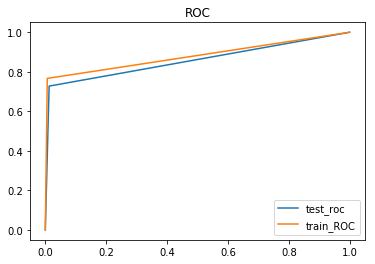

Probability density for train


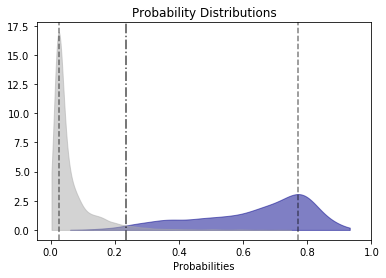

Probability density for test


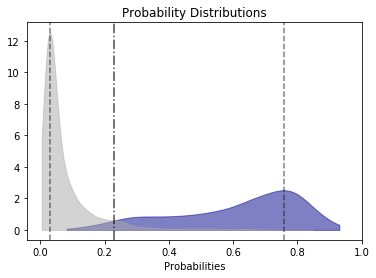


[[5796   74]
 [ 276  737]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5796   74  5870
1           276  737  1013
All        6072  811  6883


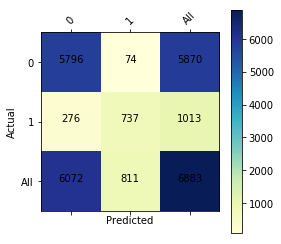


REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5870
          1       0.91      0.73      0.81      1013

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9491500799070173
-----------------
TEST_GROUPS Counter({'5o60.cif1_A': 1041, '6ek0.cif1_L5': 1041, '4wf9.cif1_X': 943, '5j7l.cif1_AA': 651, '6az1.cif1_1': 585, '6gaw.cif1_BA': 543, '5an9.cif1_N': 413, '6az3.cif1_2': 286, '5t2a.cif1_B': 252, '4ioa.cif1_Y': 60, '5xxb.cif1_3': 55, '6az3.cif1_8': 51, '4kqy.cif1_A': 45, '6eri.cif1_Ax': 43, '1yfg.cif1_A': 38, '5t83.cif1_A': 34, '6d9j.cif1_7': 33, '3ndb.cif1_M': 32, '4pr6.cif1_B': 32, '4mgn.cif1_A': 30, '4qk9.cif1_A': 28, '6cb3.cif1_B': 27, '6gaz.cif1_AV': 27, '4p5j.cif1_A': 26, '5u3g.cif1_B': 26, '3dil.cif1_A': 25, '3eph.cif1_E': 24, '3skl.cif1_B': 24, '2csx.cif1_C': 23, '3q3z.cif1_V': 23, '5o2r.cif1_x': 22, '3jbv.cif1_W': 21, '3j7q.cif1_8': 20, '5mmm.cif1_z': 20, '5xxb.cif1_4': 20, '6ek0.cif1_L8': 20, '1gax.

110 X.U.871.X.U.872.X.G.876. -_-_cWW 9.15_12.61_10.39 PROBA:  0.5505651721982325
111 X.A.38.X.U.487.X.A.658. cWW_cSH_- 10.61_8.86_13.6 PROBA:  0.3905416314850848
111 X.C.39.X.G.486.X.A.658. cWW_-_cSW 10.91_11.79_9.24 PROBA:  0.3969081356063807
111 X.G.80.X.C.105.X.A.337. cWW_-_tSS 11.15_5.86_8.33 PROBA:  0.30891873518080004
111 X.A.162.X.C.2234.X.G.2244. -_cWW_tSS 6.65_10.65_8.89 PROBA:  0.3699413888416034
111 X.A.230.X.G.456.X.C.463. tWS_cWW_- 10.06_10.87_10.5 PROBA:  0.45275356619226814
111 X.G.269.X.C.323.X.C.472. tSW_-_cWW 8.4_6.58_10.44 PROBA:  0.2912193482767736
111 X.G.283.X.C.284.X.G.287. -_tSH_tWH 6.2_8.48_12.91 PROBA:  0.343605037532446
111 X.A.342.X.A.367.X.G.381. -_tHS_cHW 16.13_9.64_13.09 PROBA:  0.4301932571187268
111 X.C.431.X.A.436.X.G.457. -_cSS_cWW 9.1_6.93_10.72 PROBA:  0.3215164350913567
111 X.A.489.X.C.1239.X.G.1283. -_cWW_tSS 5.87_10.56_8.29 PROBA:  0.3724337897378146
111 X.G.511.X.U.728.X.A.839. cSS_cWW_- 6.01_10.91_13.57 PROBA:  0.49598994085426873
111 X.C.587.X

111 E.U.8.E.A.14.E.A.21. tWH_cWS_tSW 9.47_10.23_8.55 PROBA:  0.4818252716321588
111 E.G.15.E.U.47.E.C.48. -_cSH_tWW 14.36_6.01_10.54 PROBA:  0.1537966262760752
112 E.G.9.E.G.12.E.G.22. -_-_- 12.57_14.41_10.88 PROBA:  0.517277208500073
123 E.G.9.E.G.46.E.U.47. -_-_- 3.54_5.32_8.82 PROBA:  0.7096458384224398
CONFUSION MATRIX By chain:  3eph.cif1_E
[[18  2]
 [ 2  2]]

111 A.G.10.A.U.11.A.C.49. cSH_-_cWW 6.41_11.89_10.46 PROBA:  0.3968641121208013
111 A.C.58.A.G.72.A.U.73. cWW_cSH_- 10.82_6.35_12.18 PROBA:  0.36218471699421717
111 A.C.59.A.G.71.A.A.75. cWW_cSS_- 10.45_5.59_8.25 PROBA:  0.461397928380876
111 A.C.61.A.G.68.A.C.77. -_cWW_cSH 13.87_10.57_7.47 PROBA:  0.4379087217888862
CONFUSION MATRIX By chain:  4p5j.cif1_A
[[22  0]
 [ 4  0]]

111 AA.U.37.AA.A.397.AA.A.547. tWW_cHS_- 11.19_7.63_8.76 PROBA:  0.4133281109708092
111 AA.A.51.AA.U.114.AA.A.313. cHS_cWW_- 8.0_10.38_12.64 PROBA:  0.42679640812336883
111 AA.G.82.AA.G.86.AA.C.87. cWW_cSH_cWW 12.66_5.99_10.69 PROBA:  0.4907246516661836

112 A.G.546.A.A.2278.A.U.2839. -_cWW_- 53.11_11.13_48.24 PROBA:  0.5091362542008996
CONFUSION MATRIX By chain:  5o60.cif1_A
[[891   1]
 [ 33 116]]

111 B.A.31.B.G.52.B.C.59. tWS_cWW_- 9.94_10.81_9.34 PROBA:  0.42417985578060097
111 B.G.32.B.G.33.B.U.51. cSH_cWW_cWW 6.87_10.35_11.78 PROBA:  0.44261512579057005
111 B.A.41.B.G.44.B.C.68. cWS_cWW_- 5.29_10.68_12.05 PROBA:  0.4714372254319477
CONFUSION MATRIX By chain:  3skl.cif1_B
[[20  0]
 [ 3  1]]

AUC_TRAIN =  0.8843418354521143

AUC =  0.8713580354875544


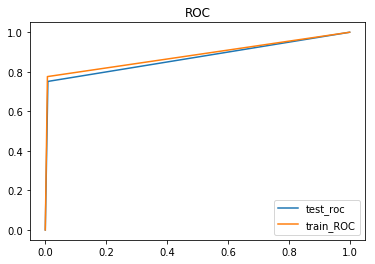

Probability density for train


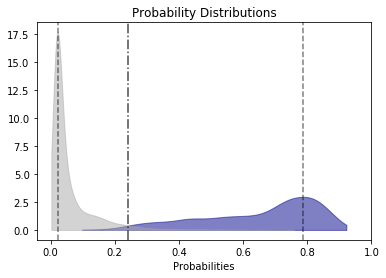

Probability density for test


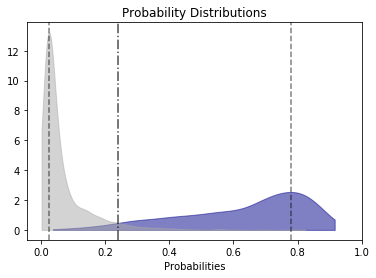


[[5820   50]
 [ 252  761]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5820   50  5870
1           252  761  1013
All        6072  811  6883


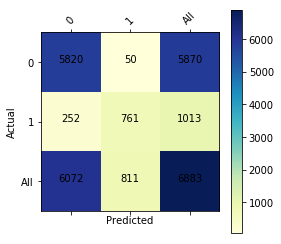


REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      5870
          1       0.94      0.75      0.83      1013

avg / total       0.96      0.96      0.95      6883

ACCURACY =  0.9561237832340549
-----------------


In [18]:
groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)
#group_kfold.get_n_splits(X, y, groups)

description = ['type', 'dssrs', 'bps', 'dists']

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    #triplexes_data = triplexes.iloc[:, 5:475]
    #print(triplexes_data)
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    print("TEST_GROUPS", Counter(list(triplexes.pdb_chain.loc[test_index])))
    rf_classifier_cv.fit(X_train, y_train)
    
    #prediction by chains
    chains = list(set(X_test_middle.pdb_chain.values))

    print("")
    for chain in chains:
        middle_check_test = X_test_middle.loc[X_test_middle['pdb_chain'] == chain]
        middle_target_test = middle_check_test['istriple']
        middle_check_test_ = middle_check_test.iloc[:, 5:475]
    
        prediction_result_by_chain = rf_classifier_cv.predict(middle_check_test_)
        predict_proba_by_chain = rf_classifier_cv.predict_proba(middle_check_test_)

        
        #PREDICTED PROBABILITIES
        i = 0
        for index, row in middle_check_test.iterrows():
            if middle_target_test[index] != prediction_result_by_chain[i]:
                print(row['type'], row['dssrs'], row['bps'], row['dists'], "PROBA: ", predict_proba_by_chain[i][1])
            i = i + 1

        print("CONFUSION MATRIX By chain: ", chain)
        print(confusion_matrix(middle_target_test, prediction_result_by_chain))
        print("")
    
    #simple prediction
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob_train = rf_classifier_cv.predict_proba(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_train)
    auc_train = metrics.roc_auc_score(y_train, prediction_train)
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_result)
    auc = metrics.roc_auc_score(y_test, prediction_result)
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()
    
    print("Probability density for train")
    probability_density(prediction_prob_train[:, 1], y_train)
    print("Probability density for test")
    probability_density(prediction_prob[:, 1], y_test)
    
    print("")
    print(confusion_matrix(y_test, prediction_result))
    plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))


    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")


[[5820   50]
 [ 252  761]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          5820   50  5870
1           252  761  1013
All        6072  811  6883


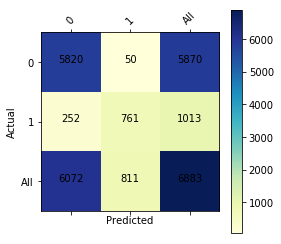

In [306]:
#example of confusion matrix

print(confusion_matrix(y_test, prediction_result))
plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))

In [33]:
prediction_prob

array([[0.97152524, 0.02847476],
       [0.93307588, 0.06692412],
       [0.32723728, 0.67276272],
       ...,
       [0.85613661, 0.14386339],
       [0.19482893, 0.80517107],
       [0.9792166 , 0.0207834 ]])


AUC_TRAIN =  0.8804808255901789

AUC =  0.8448534822535608


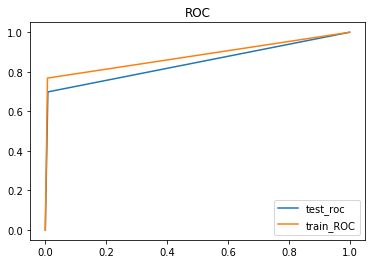

Probability density for train


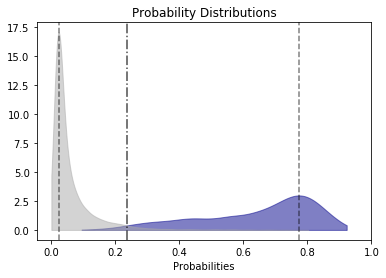

Probability density for test


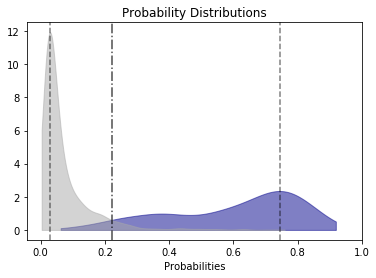


[[2910   25]
 [ 153  354]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2910   25  2935
1           153  354   507
All        3063  379  3442


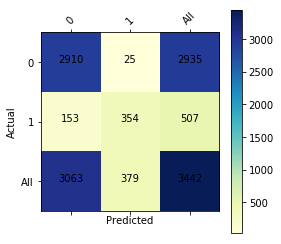

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.93      0.70      0.80       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9482858803021499
-----------------

AUC_TRAIN =  0.8824111973277565

AUC =  0.8280522430437252


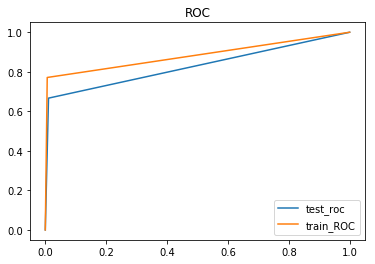

Probability density for train


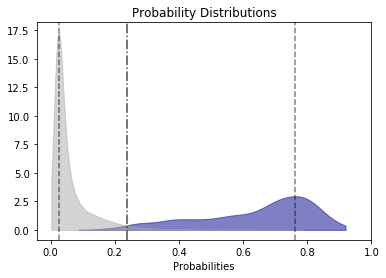

Probability density for test


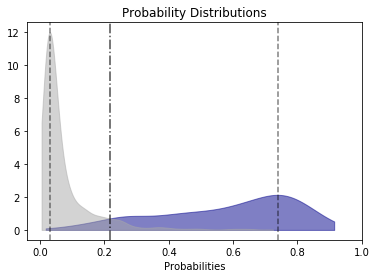


[[2904   31]
 [ 169  338]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2904   31  2935
1           169  338   507
All        3073  369  3442


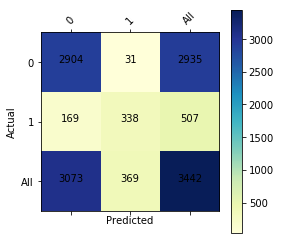

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.92      0.67      0.77       507

avg / total       0.94      0.94      0.94      3442

ACCURACY 0.9418942475305055
-----------------

AUC_TRAIN =  0.8795836248640734

AUC =  0.8532181486446982


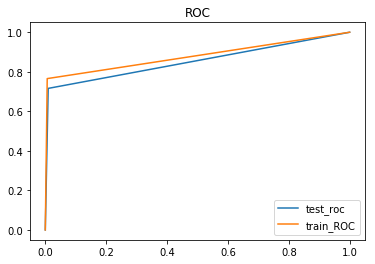

Probability density for train


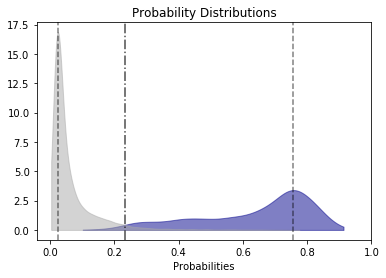

Probability density for test


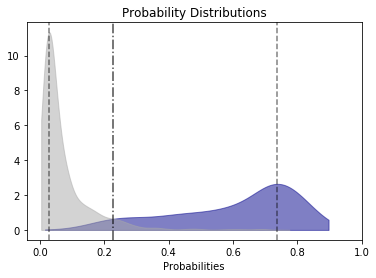


[[2907   28]
 [ 144  363]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2907   28  2935
1           144  363   507
All        3051  391  3442


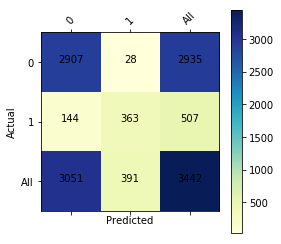

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.93      0.72      0.81       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9500290528762347
-----------------

AUC_TRAIN =  0.8797144581717423

AUC =  0.8479824198864954


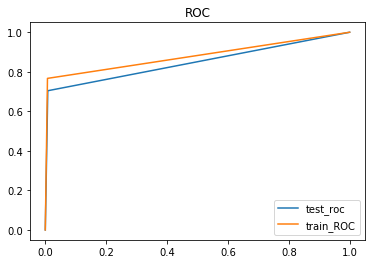

Probability density for train


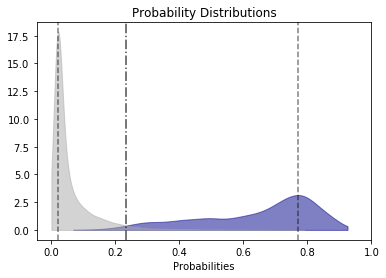

Probability density for test


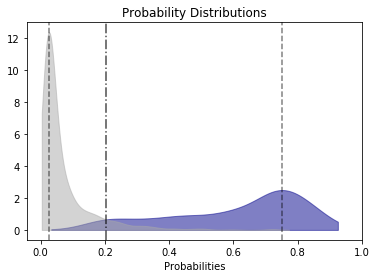


[[2911   24]
 [ 150  357]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2911   24  2935
1           150  357   507
All        3061  381  3442


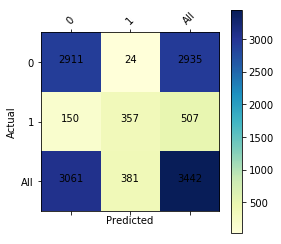

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2935
          1       0.94      0.70      0.80       507

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9494479953515398
-----------------

AUC_TRAIN =  0.8840718385646356

AUC =  0.8545442183888103


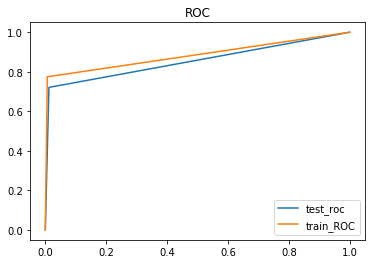

Probability density for train


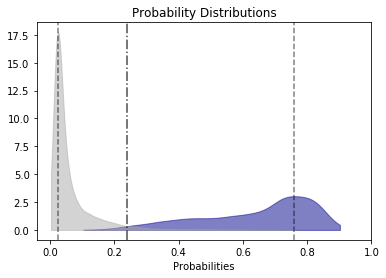

Probability density for test


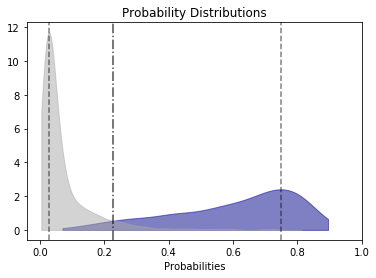


[[2898   35]
 [ 142  367]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2898   35  2933
1           142  367   509
All        3040  402  3442


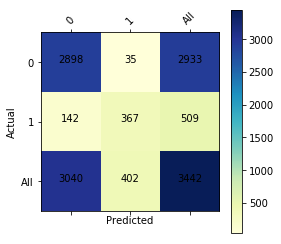

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2933
          1       0.91      0.72      0.81       509

avg / total       0.95      0.95      0.95      3442

ACCURACY 0.9485764090644974
-----------------

AUC_TRAIN =  0.8893530521351817

AUC =  0.8574658260830985


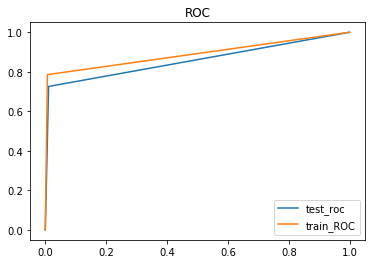

Probability density for train


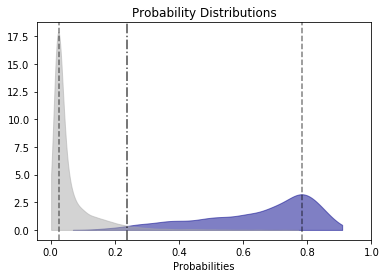

Probability density for test


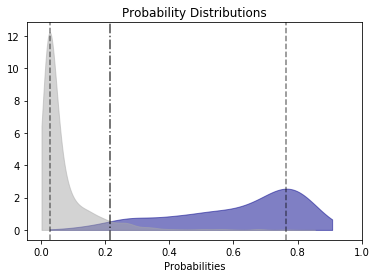


[[2902   32]
 [ 139  368]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2902   32  2934
1           139  368   507
All        3041  400  3441


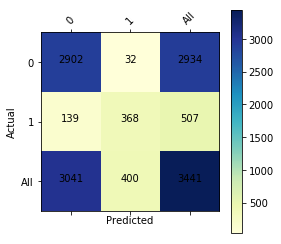

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2934
          1       0.92      0.73      0.81       507

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.9503051438535309
-----------------

AUC_TRAIN =  0.8824810500886191

AUC =  0.8380101801117342


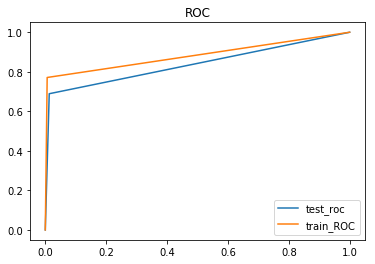

Probability density for train


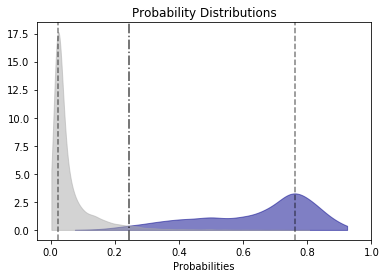

Probability density for test


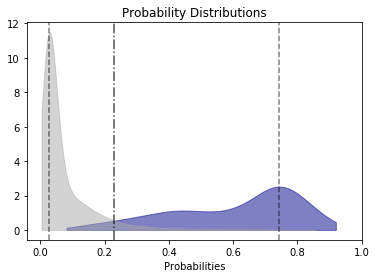


[[2895   38]
 [ 158  350]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2895   38  2933
1           158  350   508
All        3053  388  3441


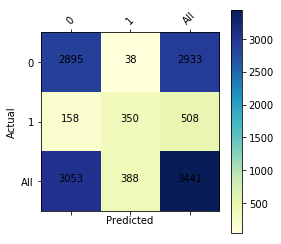

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2933
          1       0.90      0.69      0.78       508

avg / total       0.94      0.94      0.94      3441

ACCURACY 0.943039814007556
-----------------

AUC_TRAIN =  0.8841031035214562

AUC =  0.8662891285644216


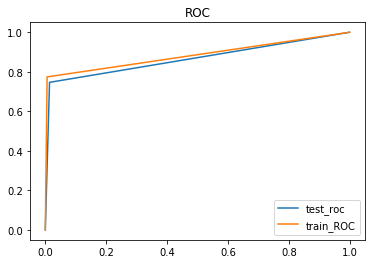

Probability density for train


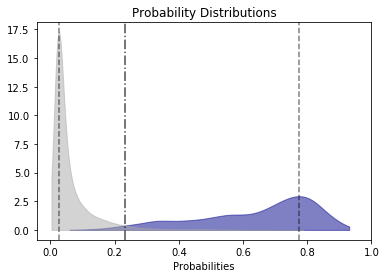

Probability density for test


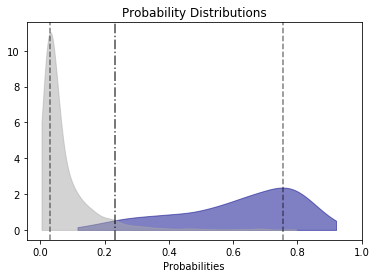


[[2891   41]
 [ 129  380]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2891   41  2932
1           129  380   509
All        3020  421  3441


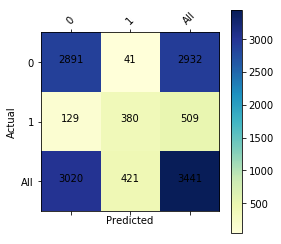

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      2932
          1       0.90      0.75      0.82       509

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.95059575704737
-----------------

AUC_TRAIN =  0.8747624527999486

AUC =  0.8493080512901183


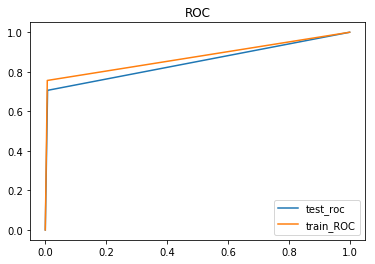

Probability density for train


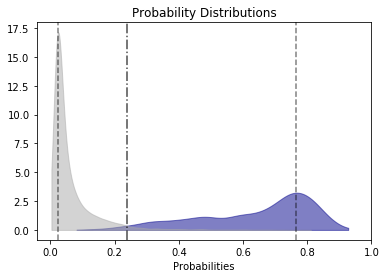

Probability density for test


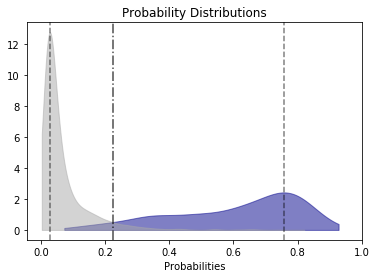


[[2912   22]
 [ 149  358]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2912   22  2934
1           149  358   507
All        3061  380  3441


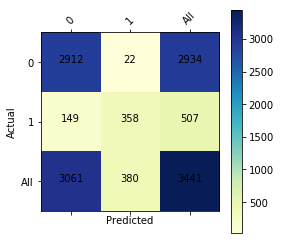

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      2934
          1       0.94      0.71      0.81       507

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.9503051438535309
-----------------

AUC_TRAIN =  0.8831858286466497

AUC =  0.862205829871188


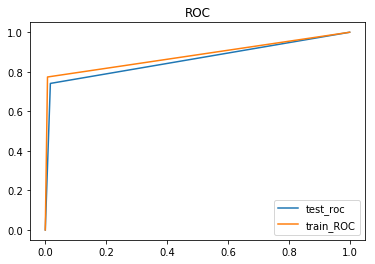

Probability density for train


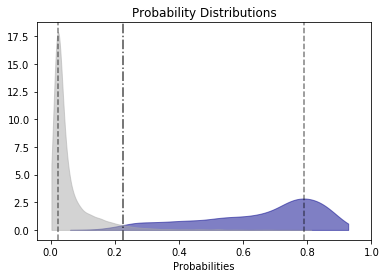

Probability density for test


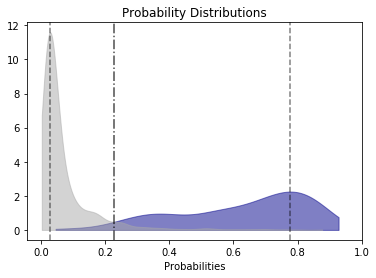


[[2886   49]
 [ 131  375]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          2886   49  2935
1           131  375   506
All        3017  424  3441


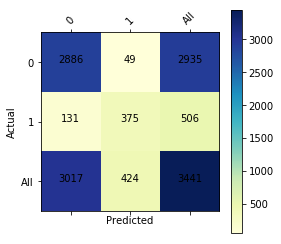

REPORT
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2935
          1       0.88      0.74      0.81       506

avg / total       0.95      0.95      0.95      3441

ACCURACY 0.9476896251089799
-----------------


In [20]:
# 10 фолдов

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=10)
#group_kfold.get_n_splits(X, y, groups)

for train_index, test_index in group_kfold.split(triplexes_data, triplexes_target, groups):
    print("")
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob_train = rf_classifier_cv.predict_proba(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_train)
    auc_train = metrics.roc_auc_score(y_train, prediction_train)
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_result)
    auc = metrics.roc_auc_score(y_test, prediction_result)
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()
    
    print("Probability density for train")
    probability_density(prediction_prob_train[:, 1], y_train)
    print("Probability density for test")
    probability_density(prediction_prob[:, 1], y_test)
    
    print("")
    print(confusion_matrix(y_test, prediction_result))
    plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))
    
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")



AUC_TRAIN =  0.8826086932375594

AUC =  0.8286445012787723


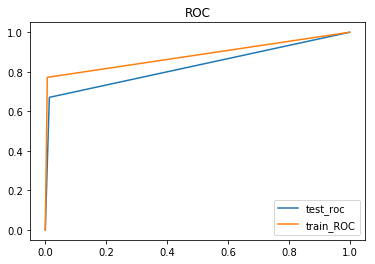

Probability density for train


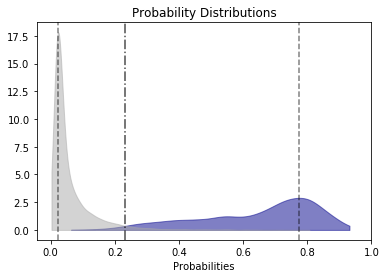

Probability density for test


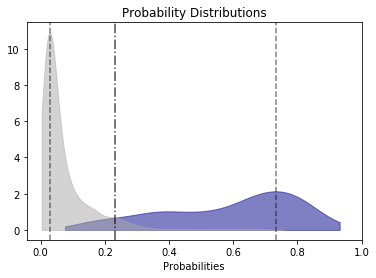


[[1929   26]
 [ 112  228]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1929   26  1955
1           112  228   340
All        2041  254  2295


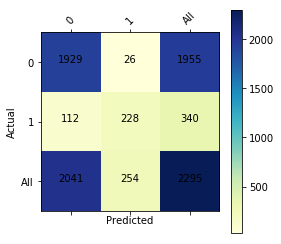

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1955
          1       0.90      0.67      0.77       340

avg / total       0.94      0.94      0.94      2295

ACCURACY 0.9398692810457516
-----------------

AUC_TRAIN =  0.8834176689600248

AUC =  0.8457587073347417


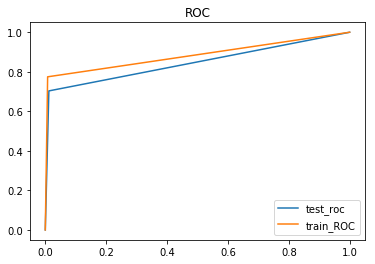

Probability density for train


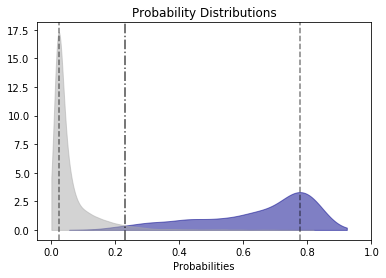

Probability density for test


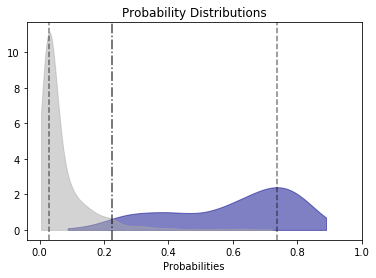


[[1935   23]
 [ 100  237]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1935   23  1958
1           100  237   337
All        2035  260  2295


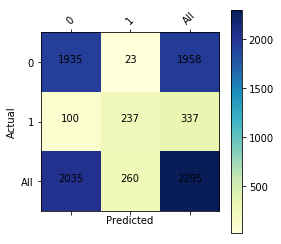

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.70      0.79       337

avg / total       0.95      0.95      0.94      2295

ACCURACY 0.9464052287581699
-----------------

AUC_TRAIN =  0.8869725444732227

AUC =  0.8520356048445937


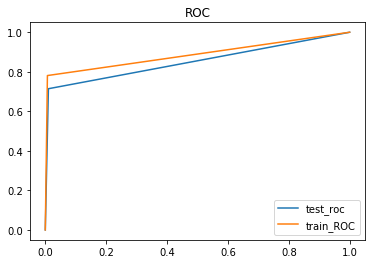

Probability density for train


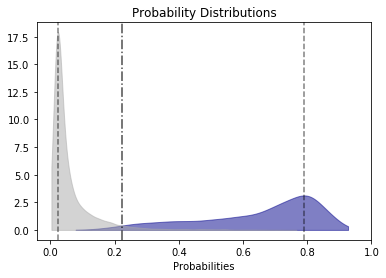

Probability density for test


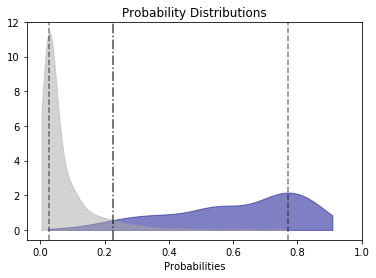


[[1938   20]
 [  96  240]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1938   20  1958
1            96  240   336
All        2034  260  2294


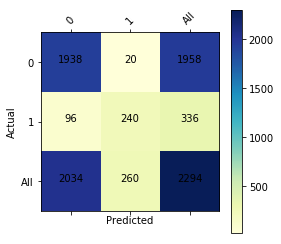

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.92      0.71      0.81       336

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.949433304272014
-----------------

AUC_TRAIN =  0.88186889532399

AUC =  0.8561618369881248


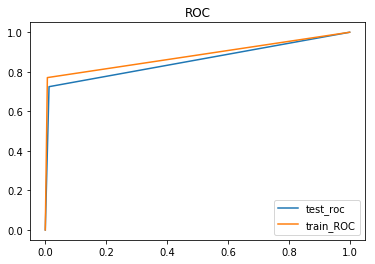

Probability density for train


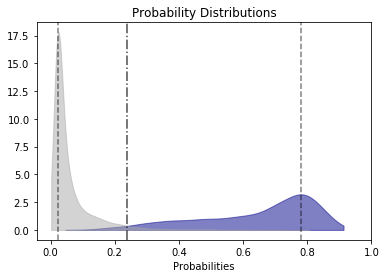

Probability density for test


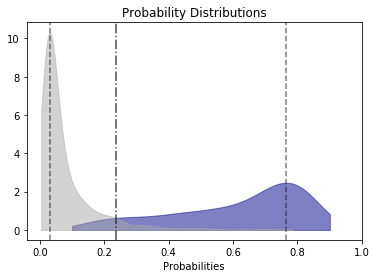


[[1925   24]
 [  95  250]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1925   24  1949
1            95  250   345
All        2020  274  2294


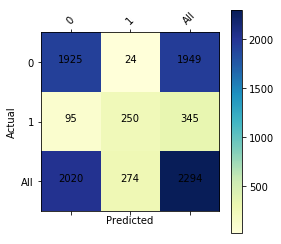

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1949
          1       0.91      0.72      0.81       345

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9481255448997384
-----------------

AUC_TRAIN =  0.8871003843085945

AUC =  0.8995944161478966


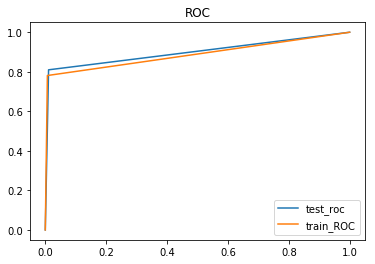

Probability density for train


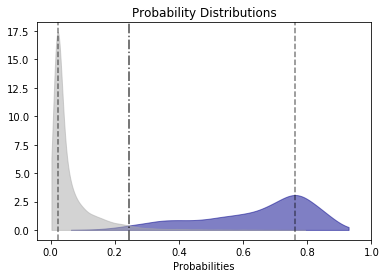

Probability density for test


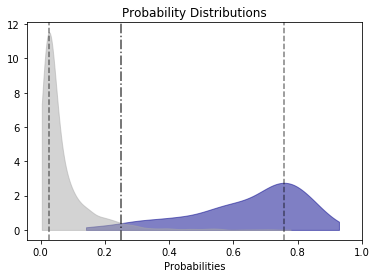


[[1932   21]
 [  65  277]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1932   21  1953
1            65  277   342
All        1997  298  2295


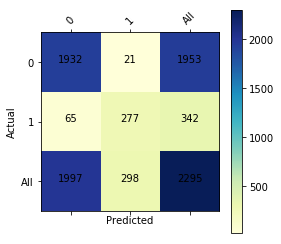

REPORT
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      1953
          1       0.93      0.81      0.87       342

avg / total       0.96      0.96      0.96      2295

ACCURACY 0.9625272331154684
-----------------

AUC_TRAIN =  0.8917101784557999

AUC =  0.8732736572890025


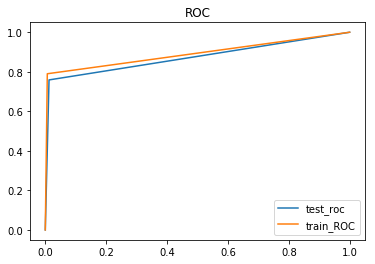

Probability density for train


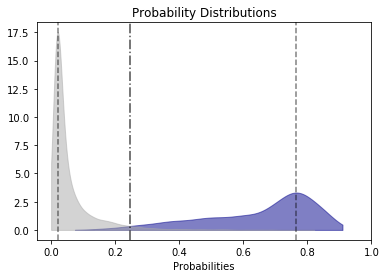

Probability density for test


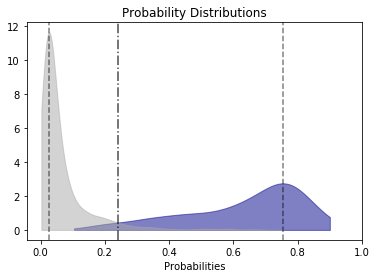


[[1931   24]
 [  82  258]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1931   24  1955
1            82  258   340
All        2013  282  2295


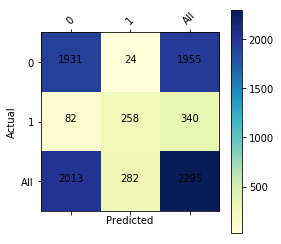

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1955
          1       0.91      0.76      0.83       340

avg / total       0.95      0.95      0.95      2295

ACCURACY 0.9538126361655773
-----------------

AUC_TRAIN =  0.8812361920855651

AUC =  0.8585186563692193


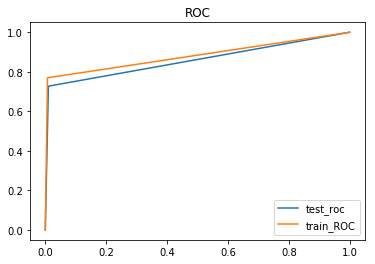

Probability density for train


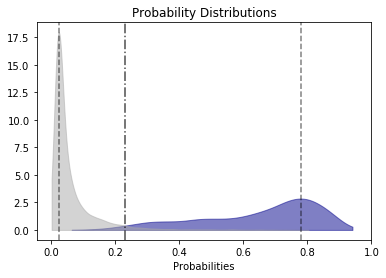

Probability density for test


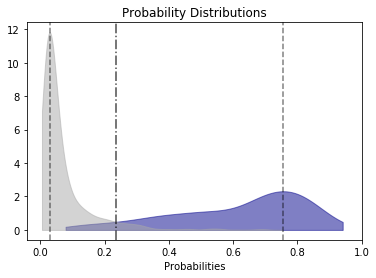


[[1934   20]
 [  93  248]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1934   20  1954
1            93  248   341
All        2027  268  2295


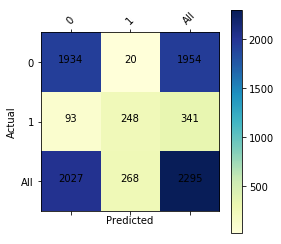

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1954
          1       0.93      0.73      0.81       341

avg / total       0.95      0.95      0.95      2295

ACCURACY 0.9507625272331155
-----------------

AUC_TRAIN =  0.880291733183292

AUC =  0.8692669881831272


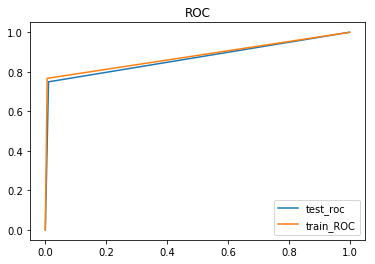

Probability density for train


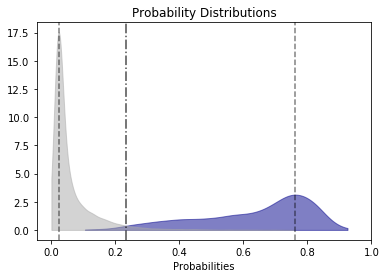

Probability density for test


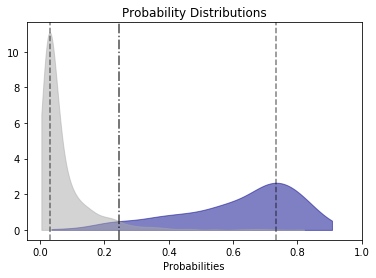


[[1938   21]
 [  84  251]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1938   21  1959
1            84  251   335
All        2022  272  2294


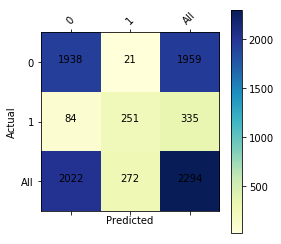

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1959
          1       0.92      0.75      0.83       335

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9542284219703574
-----------------

AUC_TRAIN =  0.8801536984749257

AUC =  0.8559352487987275


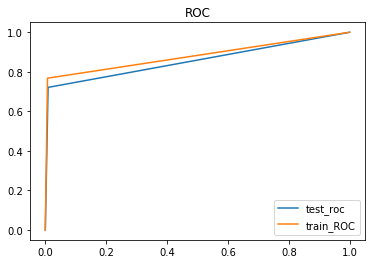

Probability density for train


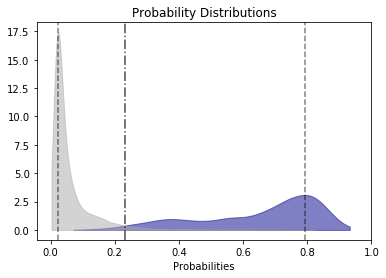

Probability density for test


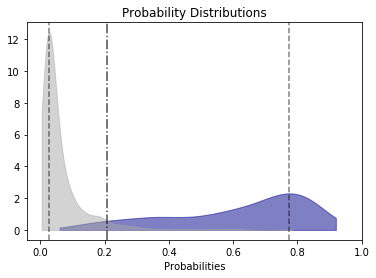


[[1939   18]
 [  94  243]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1939   18  1957
1            94  243   337
All        2033  261  2294


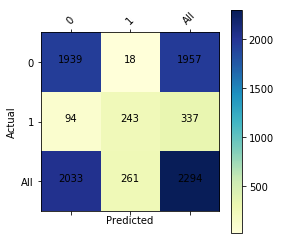

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1957
          1       0.93      0.72      0.81       337

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.951176983435048
-----------------

AUC_TRAIN =  0.8869162320070663

AUC =  0.8425751140475067


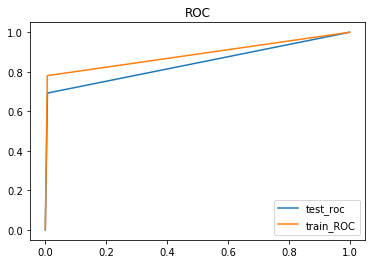

Probability density for train


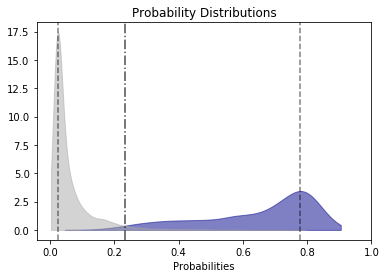

Probability density for test


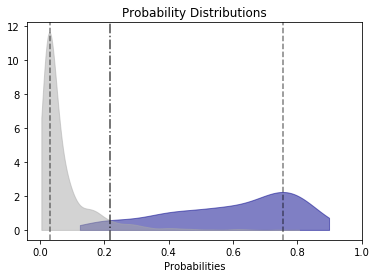


[[1942   14]
 [ 104  234]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1942   14  1956
1           104  234   338
All        2046  248  2294


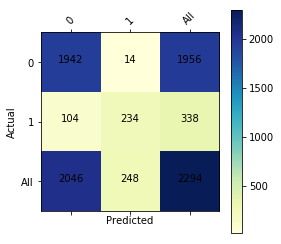

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1956
          1       0.94      0.69      0.80       338

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.948561464690497
-----------------

AUC_TRAIN =  0.8852830520691606

AUC =  0.8493146823310707


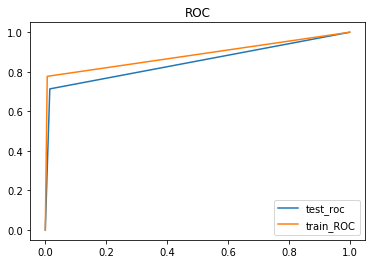

Probability density for train


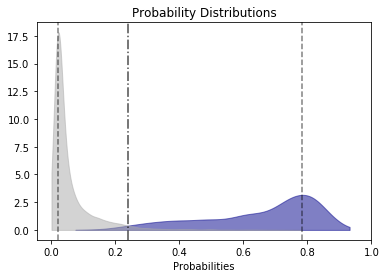

Probability density for test


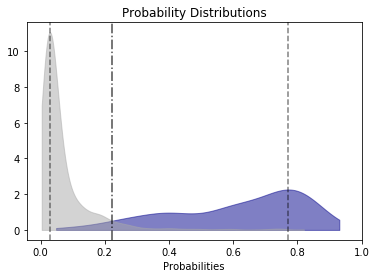


[[1930   29]
 [  96  239]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1930   29  1959
1            96  239   335
All        2026  268  2294


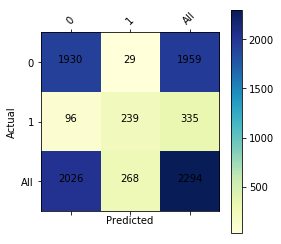

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1959
          1       0.89      0.71      0.79       335

avg / total       0.94      0.95      0.94      2294

ACCURACY 0.9455100261551874
-----------------

AUC_TRAIN =  0.8869542849691507

AUC =  0.8525022496230361


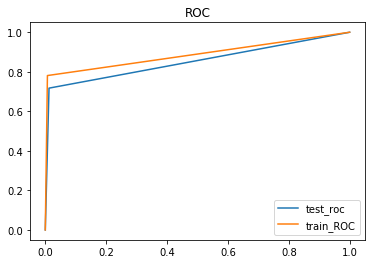

Probability density for train


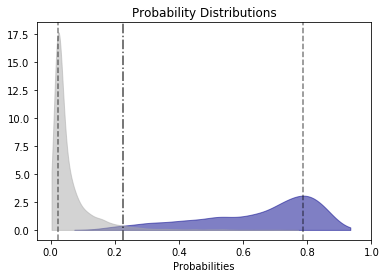

Probability density for test


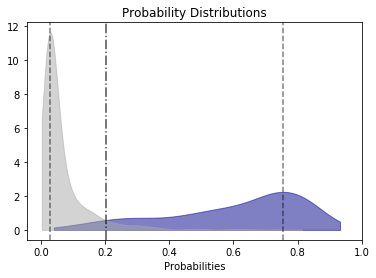


[[1934   24]
 [  95  241]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1934   24  1958
1            95  241   336
All        2029  265  2294


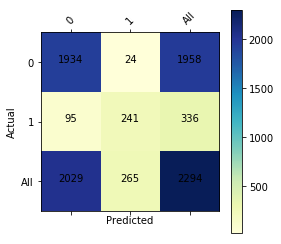

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.72      0.80       336

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9481255448997384
-----------------

AUC_TRAIN =  0.8835244323959914

AUC =  0.8734294487321669


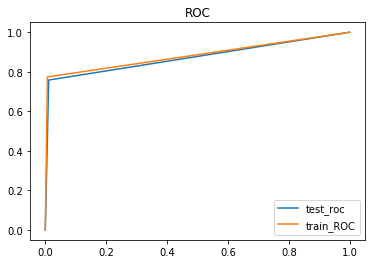

Probability density for train


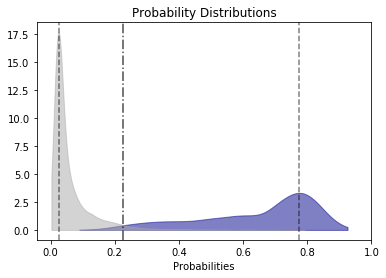

Probability density for test


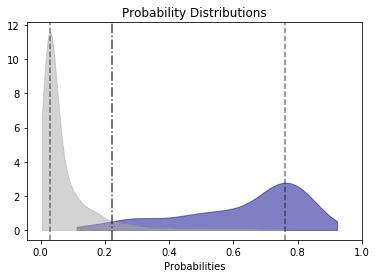


[[1933   22]
 [  82  257]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1933   22  1955
1            82  257   339
All        2015  279  2294


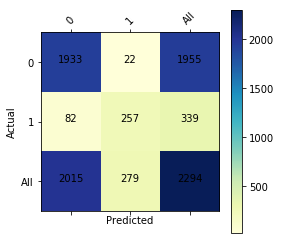

REPORT
             precision    recall  f1-score   support

          0       0.96      0.99      0.97      1955
          1       0.92      0.76      0.83       339

avg / total       0.95      0.95      0.95      2294

ACCURACY 0.9546643417611159
-----------------

AUC_TRAIN =  0.8816960565036154

AUC =  0.8346451067658934


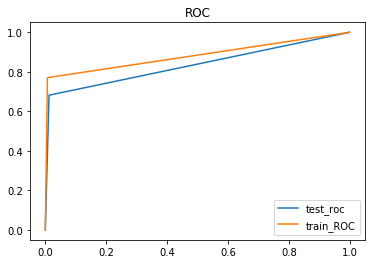

Probability density for train


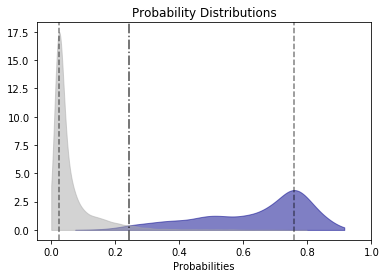

Probability density for test


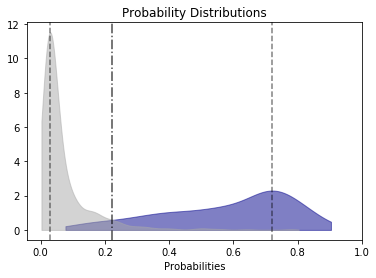


[[1934   24]
 [ 107  229]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1934   24  1958
1           107  229   336
All        2041  253  2294


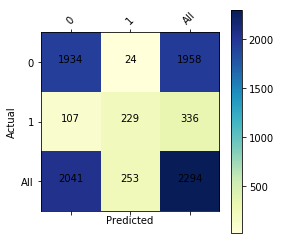

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1958
          1       0.91      0.68      0.78       336

avg / total       0.94      0.94      0.94      2294

ACCURACY 0.9428945074106364
-----------------

AUC_TRAIN =  0.8928359468794803

AUC =  0.8341417630388669


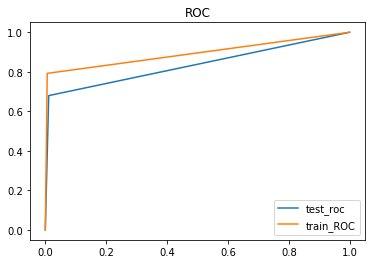

Probability density for train


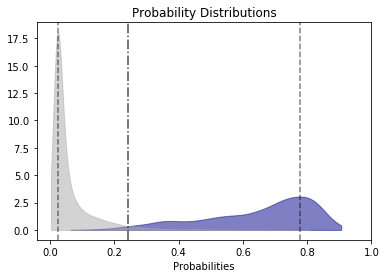

Probability density for test


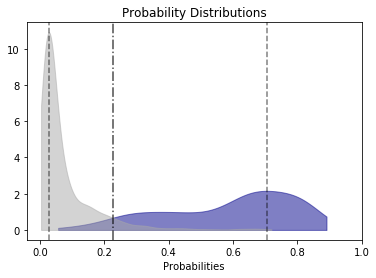


[[1935   22]
 [ 108  229]]
CONFUSION MATRIX
Predicted     0    1   All
Actual                    
0          1935   22  1957
1           108  229   337
All        2043  251  2294


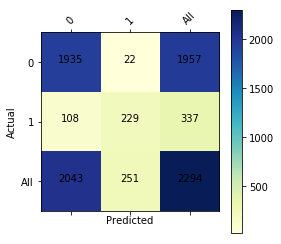

REPORT
             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1957
          1       0.91      0.68      0.78       337

avg / total       0.94      0.94      0.94      2294

ACCURACY 0.9433304272013949
-----------------


In [21]:
# 15 фолдов

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=15)

for train_index, test_index in group_kfold.split(triplexes_data, triplexes_target, groups):
    print("")
    X_train, X_test = triplexes_data.loc[list(train_index)], triplexes_data.loc[test_index]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]
    rf_classifier_cv.fit(X_train, y_train)
    prediction_result = rf_classifier_cv.predict(X_test)
    prediction_prob = rf_classifier_cv.predict_proba(X_test)
    
    #TRY TO PREDICT TRAIN
    prediction_train = rf_classifier_cv.predict(X_train)
    prediction_prob_train = rf_classifier_cv.predict_proba(X_train)
    fpr_train, tpr_train, _ = metrics.roc_curve(y_train,  prediction_train)
    auc_train = metrics.roc_auc_score(y_train, prediction_train)
    print("AUC_TRAIN = ", auc_train)
    
    #---------------------------------
    print("")
    fpr, tpr, _ = metrics.roc_curve(y_test,  prediction_result)
    auc = metrics.roc_auc_score(y_test, prediction_result)
    print("AUC = ", auc)
    line_test, = plt.plot(fpr, tpr, label='test_roc')
    line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
    plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
    plt.title("ROC")
    plt.show()
    
    print("Probability density for train")
    probability_density(prediction_prob_train[:, 1], y_train)
    print("Probability density for test")
    probability_density(prediction_prob[:, 1], y_test)
    
    print("")
    print(confusion_matrix(y_test, prediction_result))
    plot_confusion_matrix(pd.crosstab(y_test, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))
    
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY", accuracy_score(y_test, prediction_result))
    print("-----------------")


# Попробуем изменить порог (threshold) - ЭКСПЕРИМЕНТ

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomThreshold(BaseEstimator, ClassifierMixin):
    """ Custom threshold wrapper for binary classification"""
    def __init__(self, base, threshold=0.5):
        self.base = base
        self.threshold = threshold
    def fit(self, *args, **kwargs):
        self.base.fit(*args, **kwargs)
        return self
    def predict(self, X):
        return (self.base.predict_proba(X)[:, 1] > self.threshold).astype(int)



In [39]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 75 

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.75

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5852   11]
 [ 746  274]]

REPORT
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      5863
          1       0.96      0.27      0.42      1020

avg / total       0.90      0.89      0.86      6883

ACCURACY =  0.8900188871131774
-----------------

CONFUSION MATRIX
[[5860   10]
 [ 737  276]]

REPORT
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      5870
          1       0.97      0.27      0.42      1013

avg / total       0.90      0.89      0.86      6883

ACCURACY =  0.8914717419729768
-----------------

CONFUSION MATRIX
[[5866    2]
 [ 662  353]]

REPORT
             precision    recall  f1-score   support

          0       0.90      1.00      0.95      5868
          1       0.99      0.35      0.52      1015

avg / total       0.91      0.90      0.88      6883

ACCURACY =  0.9035304373093128
-----------------

CONFUSION MATRIX
[[5865    5]
 [ 708  305]]

REP

In [42]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 24

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.24

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5565  298]
 [  91  929]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.95      0.97      5863
          1       0.76      0.91      0.83      1020

avg / total       0.95      0.94      0.95      6883

ACCURACY =  0.9434839459537993
-----------------

CONFUSION MATRIX
[[5555  315]
 [  71  942]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      5870
          1       0.75      0.93      0.83      1013

avg / total       0.95      0.94      0.95      6883

ACCURACY =  0.9439198024117391
-----------------

CONFUSION MATRIX
[[5558  310]
 [  44  971]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.95      0.97      5868
          1       0.76      0.96      0.85      1015

avg / total       0.96      0.95      0.95      6883

ACCURACY =  0.9485689379630975
-----------------

CONFUSION MATRIX
[[5524  346]
 [  44  969]]

REP

In [41]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 20

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.2

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5422  441]
 [  49  971]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.92      0.96      5863
          1       0.69      0.95      0.80      1020

avg / total       0.95      0.93      0.93      6883

ACCURACY =  0.9288101118698242
-----------------

CONFUSION MATRIX
[[5418  452]
 [  39  974]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.92      0.96      5870
          1       0.68      0.96      0.80      1013

avg / total       0.95      0.93      0.93      6883

ACCURACY =  0.9286648263838443
-----------------

CONFUSION MATRIX
[[5405  463]
 [  28  987]]

REPORT
             precision    recall  f1-score   support

          0       0.99      0.92      0.96      5868
          1       0.68      0.97      0.80      1015

avg / total       0.95      0.93      0.93      6883

ACCURACY =  0.9286648263838443
-----------------

CONFUSION MATRIX
[[5385  485]
 [  28  985]]

REP

In [43]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 30

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.3

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5700  163]
 [ 140  880]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      5863
          1       0.84      0.86      0.85      1020

avg / total       0.96      0.96      0.96      6883

ACCURACY =  0.955978497748075
-----------------

CONFUSION MATRIX
[[5688  182]
 [ 122  891]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.97      0.97      5870
          1       0.83      0.88      0.85      1013

avg / total       0.96      0.96      0.96      6883

ACCURACY =  0.955833212262095
-----------------

CONFUSION MATRIX
[[5658  210]
 [  91  924]]

REPORT
             precision    recall  f1-score   support

          0       0.98      0.96      0.97      5868
          1       0.81      0.91      0.86      1015

avg / total       0.96      0.96      0.96      6883

ACCURACY =  0.9562690687200349
-----------------

CONFUSION MATRIX
[[5675  195]
 [  99  914]]

REPOR

In [44]:
#ДЛЯ СРАВНЕНИЯ НАПРИМЕР ПОРОГ 40

rf_classifier_cv = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

groups = np.array(triplexes.pdb_chain.values)
group_kfold = GroupKFold(n_splits=5)

threshold = 0.4

for train_index, test_index in group_kfold.split(triplexes, triplexes_target, groups):
    X_train_middle, X_test_middle = triplexes.loc[list(train_index)], triplexes.loc[test_index]
    X_train = X_train_middle.iloc[:, 5:475]
    X_test = X_test_middle.iloc[:, 5:475]
    y_train, y_test = triplexes_target.loc[train_index], triplexes_target.loc[test_index]

    
    a = Counter(list(triplexes.loc[list(train_index)].pdb_chain.values))
    b = Counter(list(triplexes.loc[list(test_index)].pdb_chain.values))
    
    for key in a:
        if key in b.keys():
            print("FUUUUUUUUU")
    rf_classifier_cv.fit(X_train, y_train)
    
    model_thresholded = CustomThreshold(rf_classifier_cv, threshold)

    prediction_result = model_thresholded.predict(X_test)
    
    print("")
    print("CONFUSION MATRIX")
    print(confusion_matrix(y_test, prediction_result))
    print("")
    print("REPORT")
    print(classification_report(y_test, prediction_result))
    print("ACCURACY = ", accuracy_score(y_test, prediction_result))
    print("-----------------")



CONFUSION MATRIX
[[5755  108]
 [ 245  775]]

REPORT
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5863
          1       0.88      0.76      0.81      1020

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9487142234490774
-----------------

CONFUSION MATRIX
[[5776   94]
 [ 222  791]]

REPORT
             precision    recall  f1-score   support

          0       0.96      0.98      0.97      5870
          1       0.89      0.78      0.83      1013

avg / total       0.95      0.95      0.95      6883

ACCURACY =  0.9540897864303356
-----------------

CONFUSION MATRIX
[[5744  124]
 [ 181  834]]

REPORT
             precision    recall  f1-score   support

          0       0.97      0.98      0.97      5868
          1       0.87      0.82      0.85      1015

avg / total       0.95      0.96      0.96      6883

ACCURACY =  0.955687926776115
-----------------

CONFUSION MATRIX
[[5755  115]
 [ 187  826]]

REPO